In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import os
from FACS_Sampling.utils import create_adata

sc.set_figure_params(figsize=(8,8), fontsize=15, )
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=40, facecolor='white')
# import warnings
# warnings.filterwarnings("ignore")

/home/ekarimi/miniconda3/envs/facs_sampling/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.26.0 scipy==1.11.4 pandas==2.1.1 scikit-learn==1.3.2 statsmodels==0.14.0 igraph==0.11.3 pynndescent==0.5.11


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:

# Get the file path from the environment variable
file_path_env = os.getenv('MY_FACS_DATA_PATH')
input_file1 = os.path.join(file_path_env,'sara_data',"adata_ref_sara_2M.h5ad")
input_file2 = os.path.join(file_path_env,'sara_data', 'reps',"random_adata_2_30__0.h5ad")
input_file3 = os.path.join(file_path_env,'sara_data', 'reps',"fsbs_adata_2_30__0.h5ad")

adata_ref = sc.read_h5ad(input_file1)
adata_random = sc.read_h5ad(input_file2)
adata_fsbs =  sc.read_h5ad(input_file3)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scanpy as sc

# Set the style for seaborn plots
sns.set_style('whitegrid')

def plot_feature_distribution(adata_list, feature_name, dataset_labels):
    plt.figure(figsize=(10, 6))

    # Plotting the KDE for each dataset
    for adata, label in zip(adata_list, dataset_labels):
        sns.kdeplot(
            adata.obs_vector(feature_name),  # This extracts the feature values
            label=label,
            shade=True  # Shade under the KDE curve
        )

    plt.title(f'Distribution of {feature_name}')
    plt.xlabel(f'{feature_name} Value')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()





In [11]:
adata_ref.obs['population'].value_counts()

population
hspc_like                            457833
classical_monocytes                  416427
late_promyelocyte_like               332649
(progenitor)_erythroid_like          236437
myelocytes                           103392
activated_classical_monocyte_like     99966
early_promyelocyte_like               65347
intermediate_monocyte_like            59779
cd117+_hscp_like                      55780
pdc_progenitor_like                   48469
neutrophil_like                       28218
granulocyte_progenitor_like           26185
non_classical_monocyte_like           25014
conventional_dendritic_like           23128
pdc_like                              12464
eosinophil_like                        8912
Name: count, dtype: int64

In [18]:
eo = adata_ref[adata_ref.obs['population']=='eosinophil_like']

In [19]:
pdc = adata_ref[adata_ref.obs['population']=='pdc_like']

In [20]:
dend = adata_ref[adata_ref.obs['population']=='conventional_dendritic_like']

In [21]:
non_clas = adata_ref[adata_ref.obs['population']=='non_classical_monocyte_like']

In [24]:
granu = adata_ref[adata_ref.obs['population']=='granulocyte_progenitor_like']

In [25]:
neut = adata_ref[adata_ref.obs['population']=='neutrophil_like']

In [26]:
pdc_prog = adata_ref[adata_ref.obs['population']=='pdc_progenitor_like']

In [27]:
cd117 = adata_ref[adata_ref.obs['population']=='cd117+_hscp_like']

In [29]:
mono = adata_ref[adata_ref.obs['population']=='intermediate_monocyte_like']

In [30]:
promyelo = adata_ref[adata_ref.obs['population']=='early_promyelocyte_like']

In [31]:
act_clas = adata_ref[adata_ref.obs['population']=='activated_classical_monocyte_like']

In [32]:
myelo = adata_ref[adata_ref.obs['population']=='myelocytes']

In [34]:
eryth = adata_ref[adata_ref.obs['population']=='(progenitor)_erythroid_like']

In [35]:
late_prom = adata_ref[adata_ref.obs['population']=='late_promyelocyte_like']

In [36]:
clas_mono = adata_ref[adata_ref.obs['population']=='classical_monocytes']

In [37]:
hspc = adata_ref[adata_ref.obs['population']=='hspc_like']

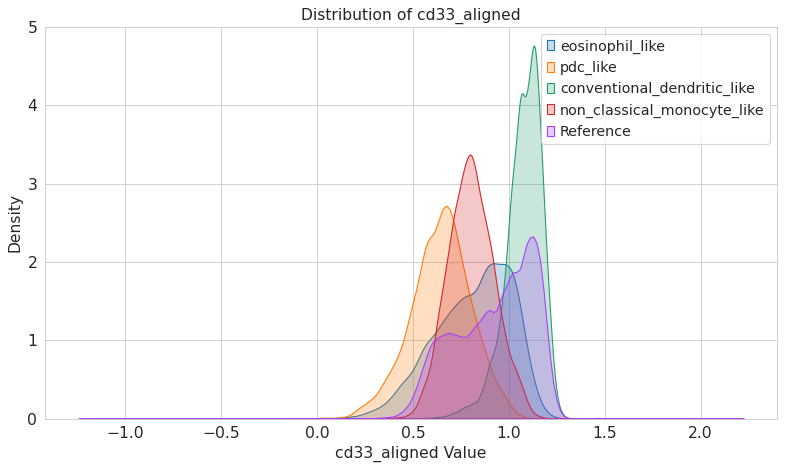

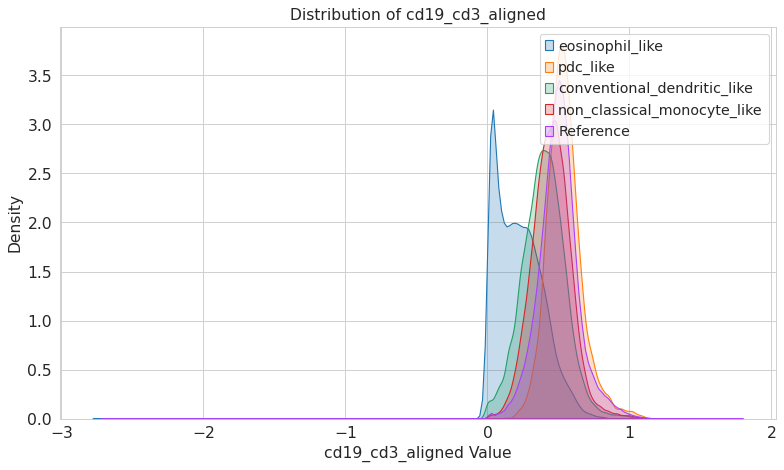

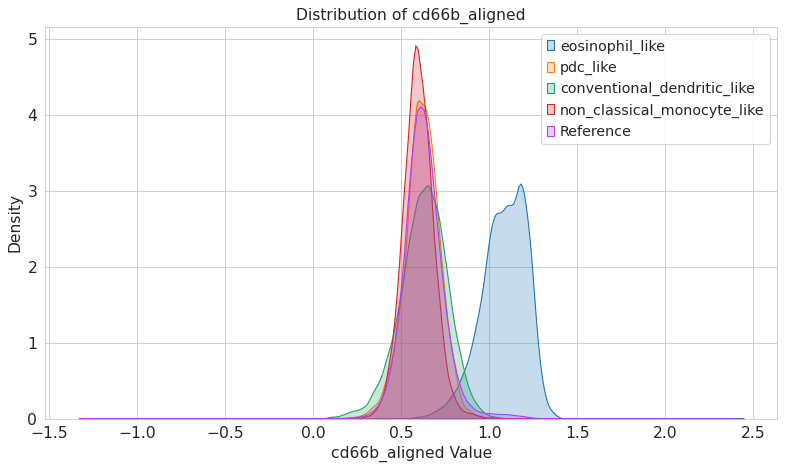

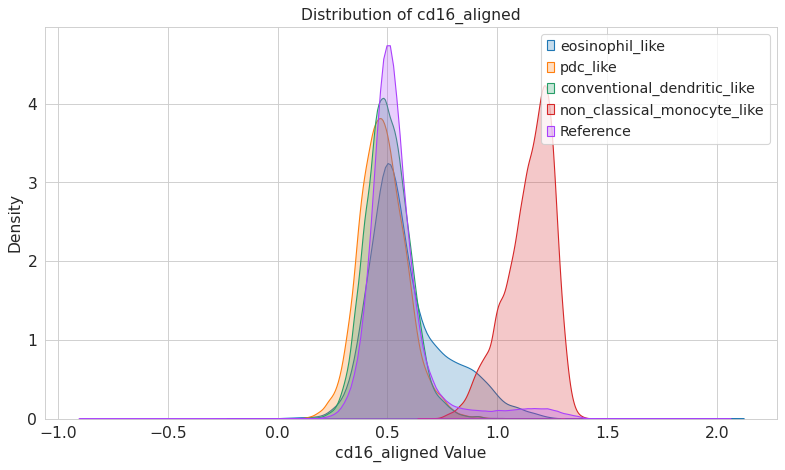

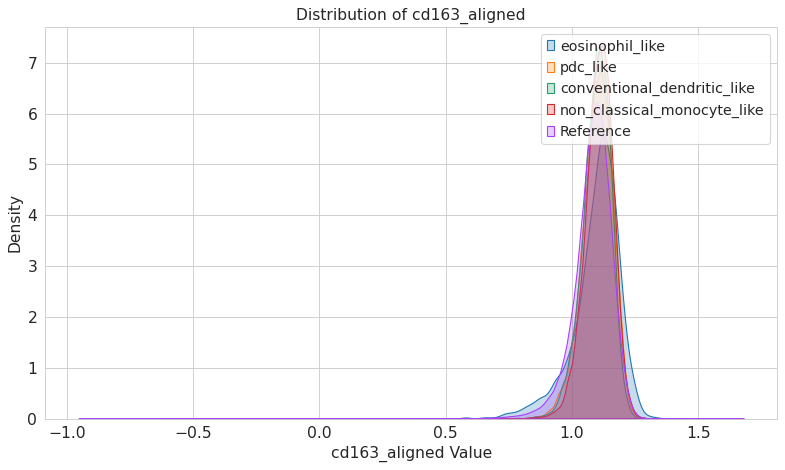

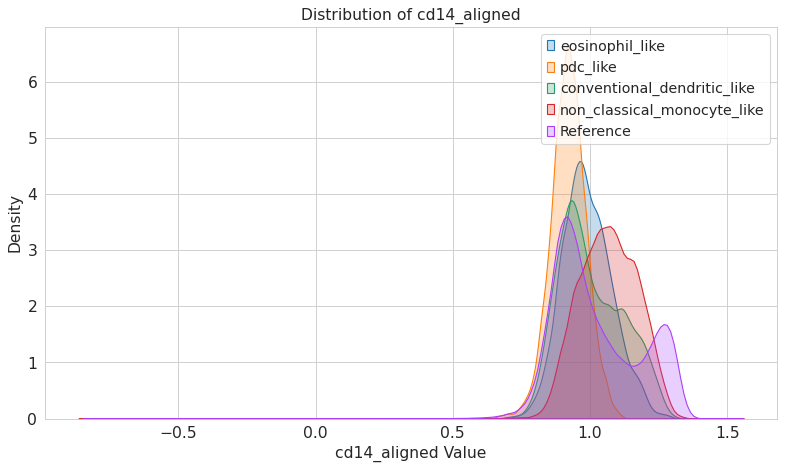

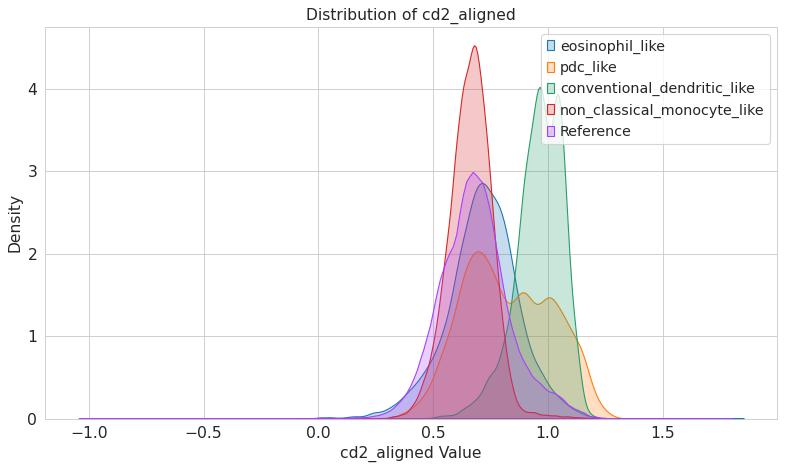

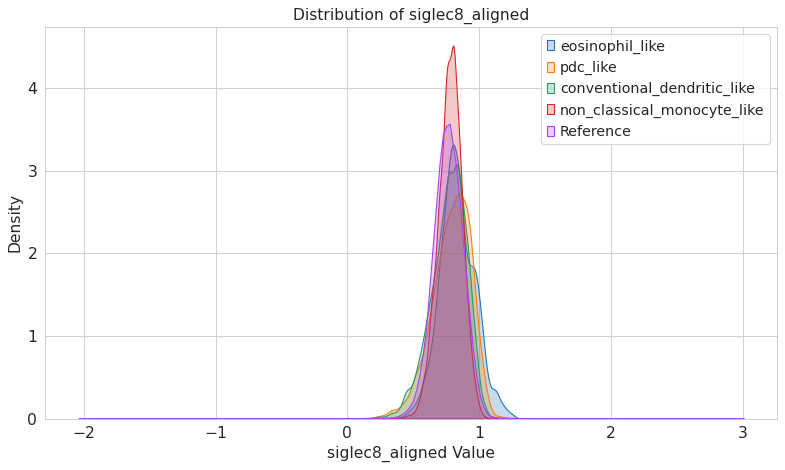

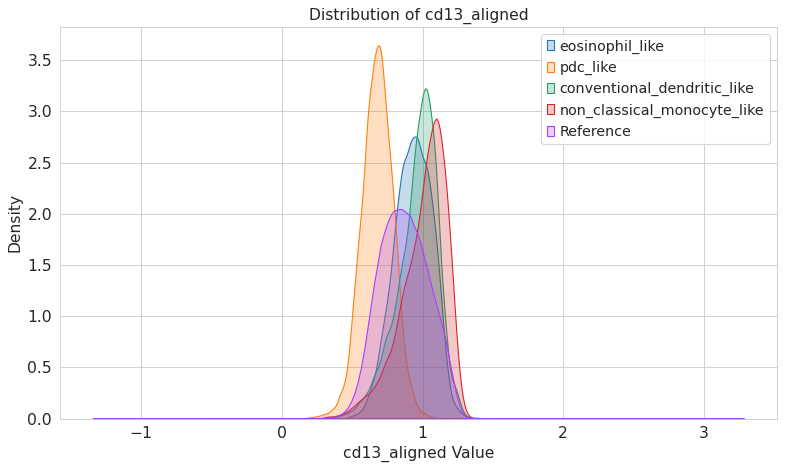

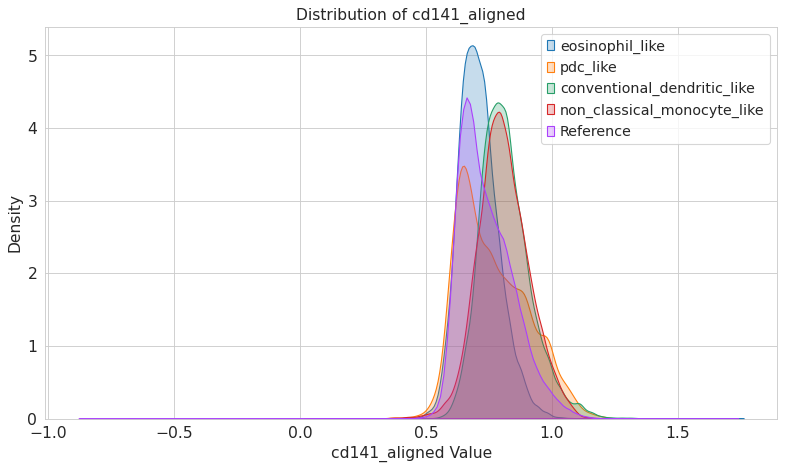

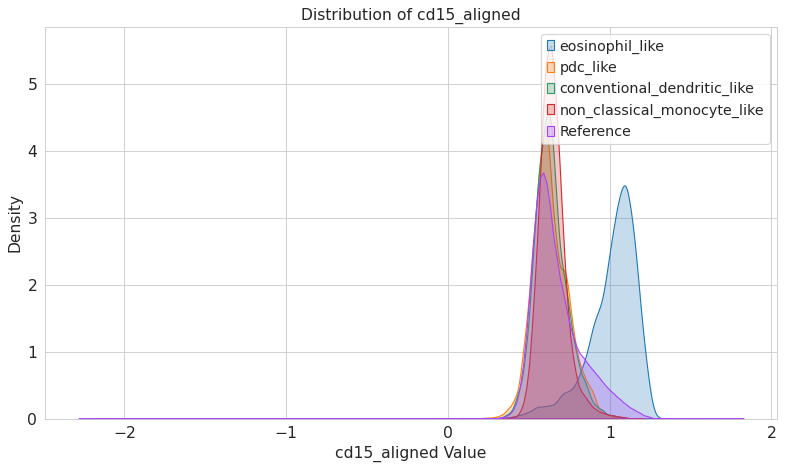

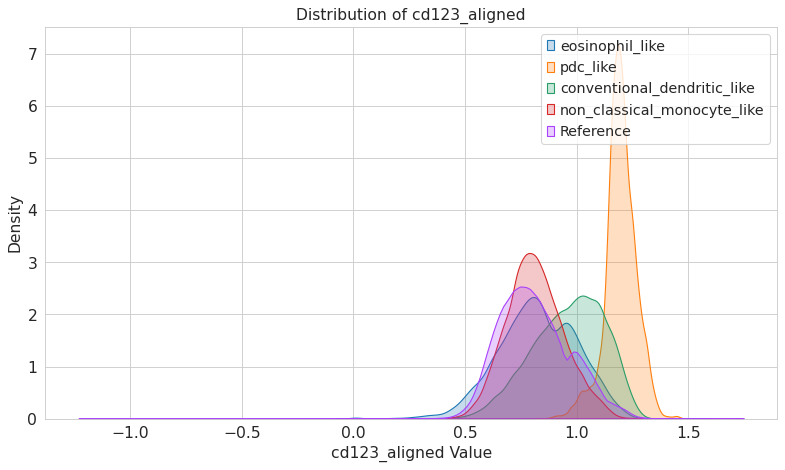

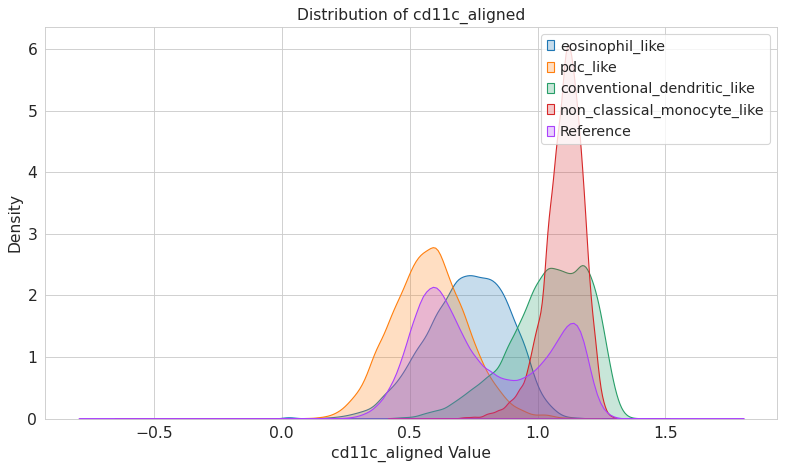

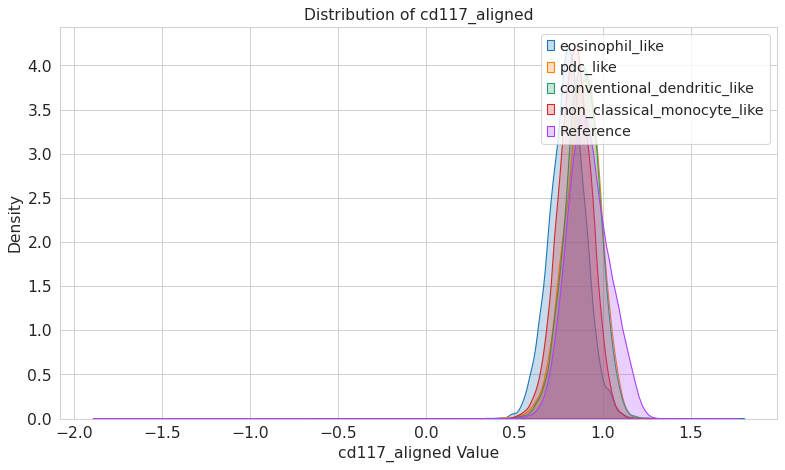

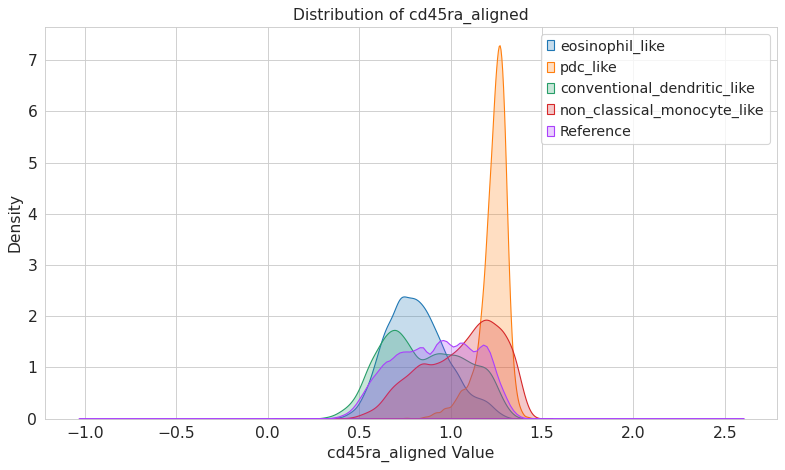

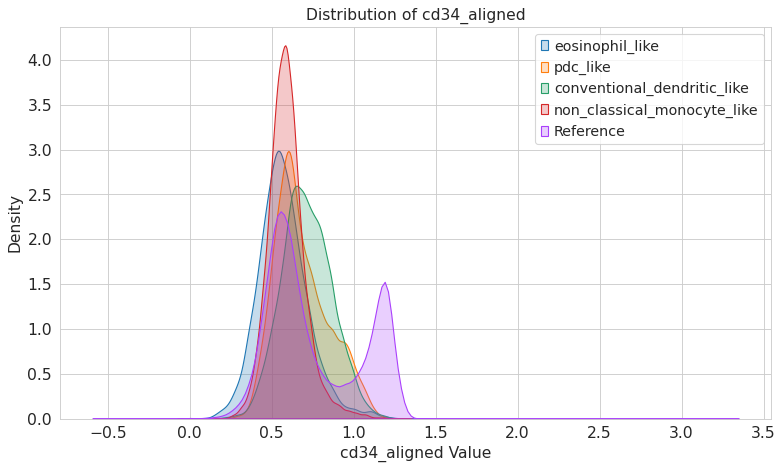

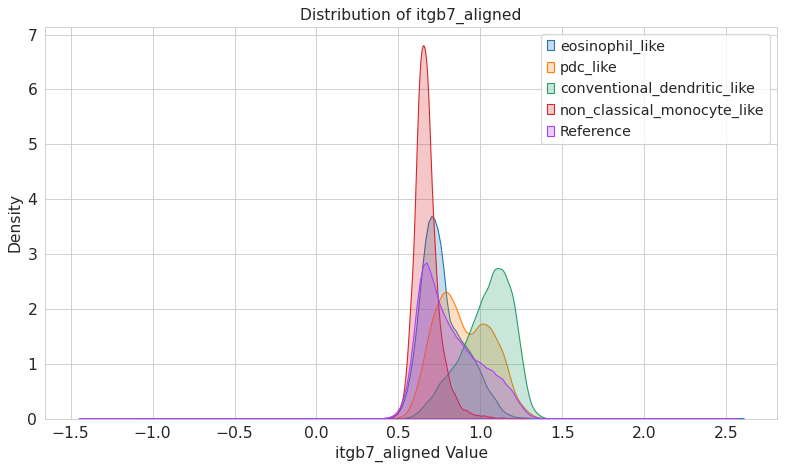

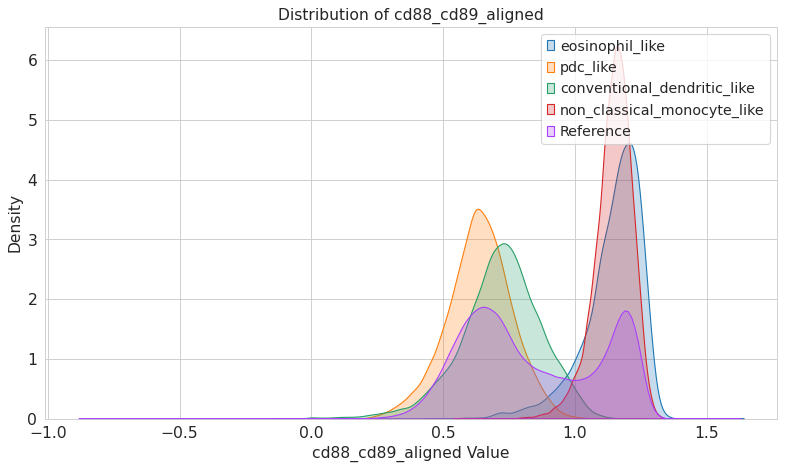

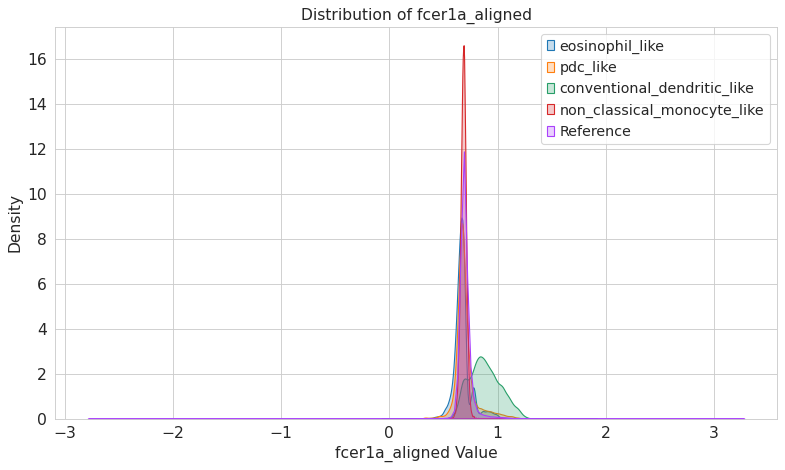

In [ ]:
for marker in adata_ref.var_names:
    plot_feature_distribution([eo, pdc, dend, non_clas, adata_ref], marker ,
                              ['eosinophil_like','pdc_like', 'conventional_dendritic_like', 'non_classical_monocyte_like', 'Reference'])

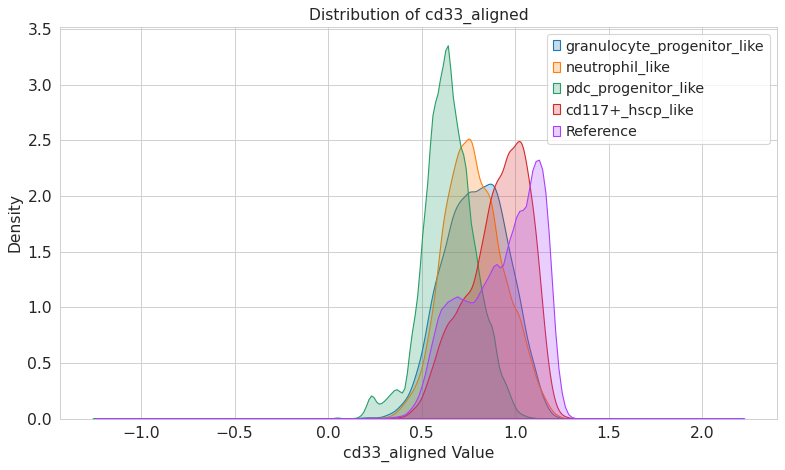

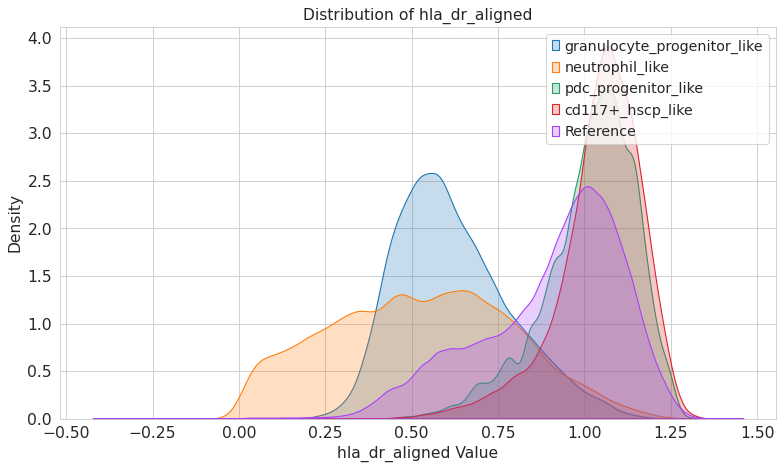

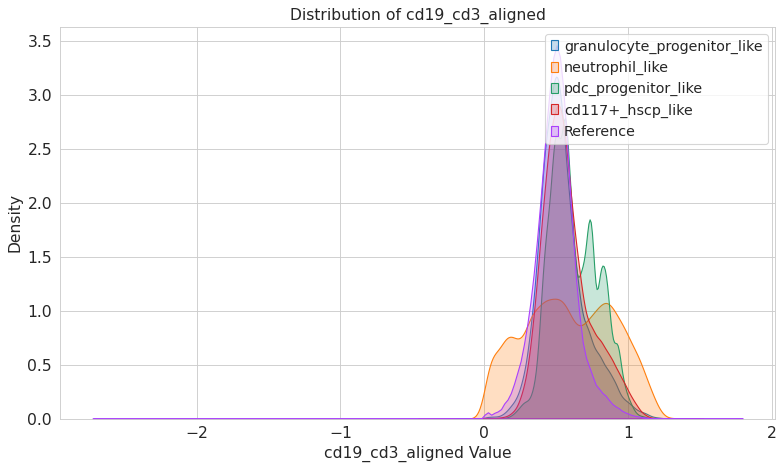

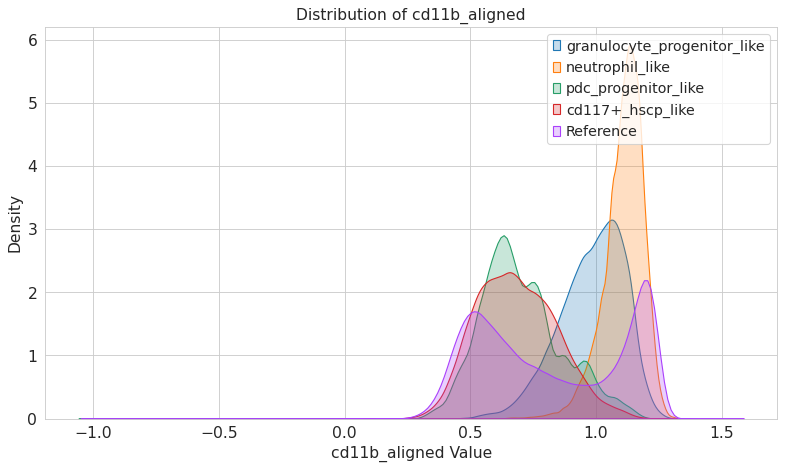

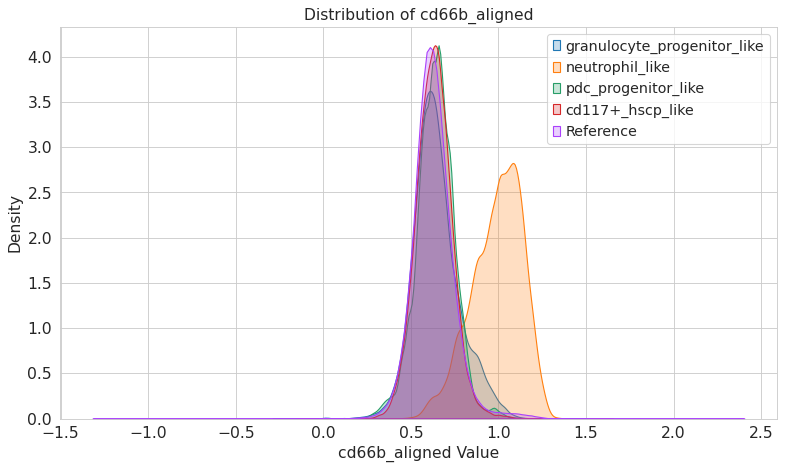

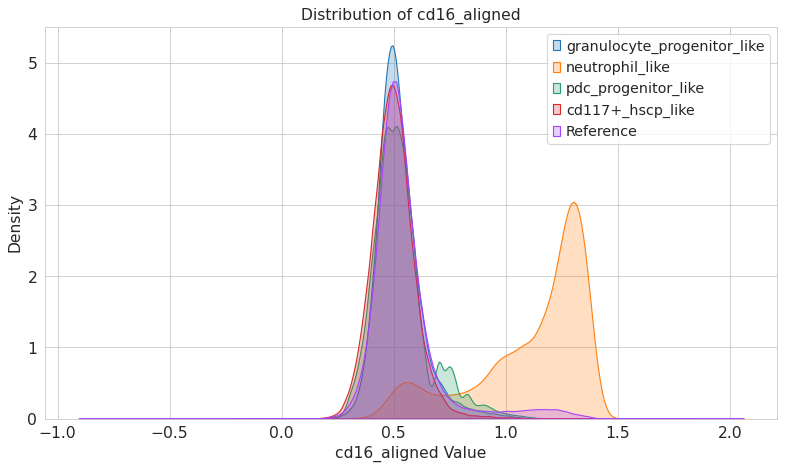

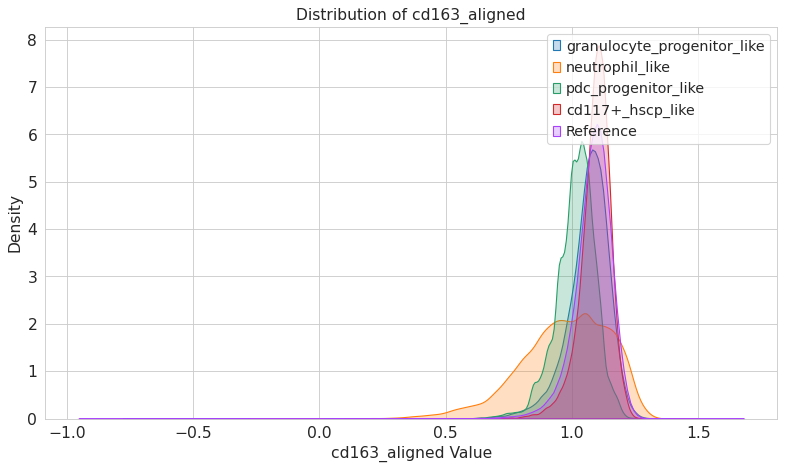

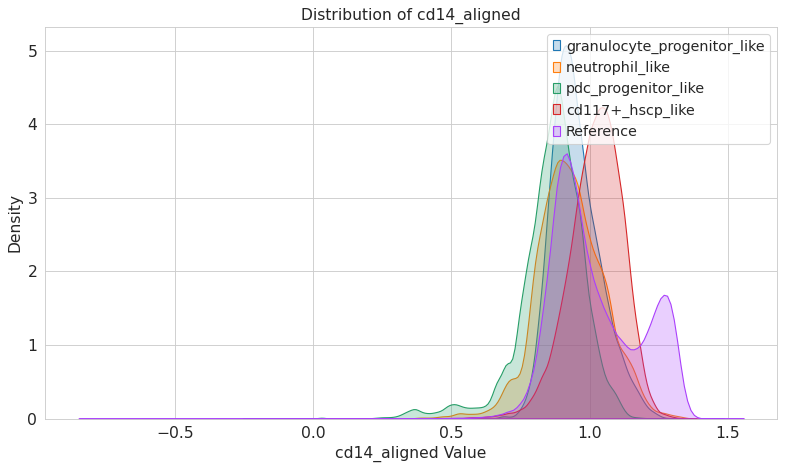

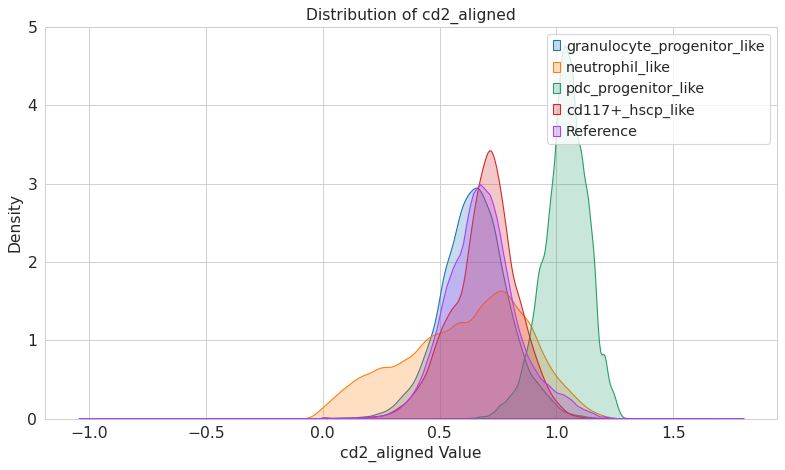

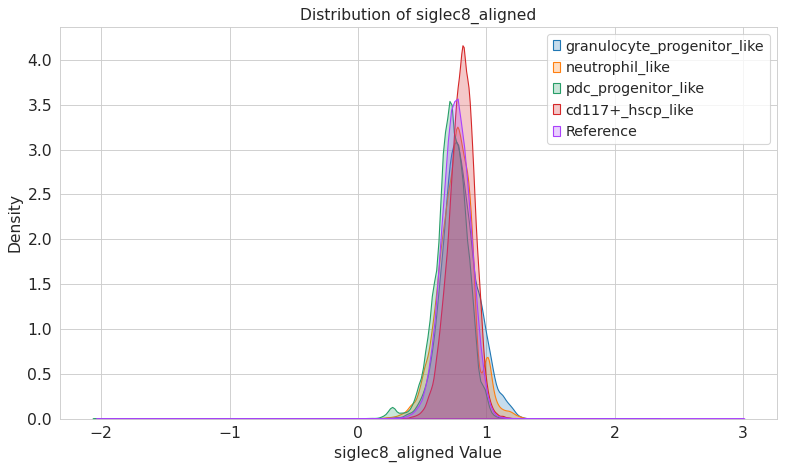

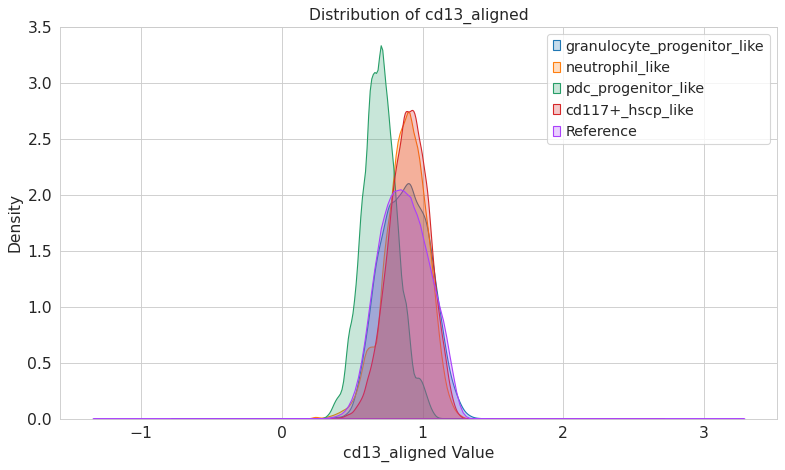

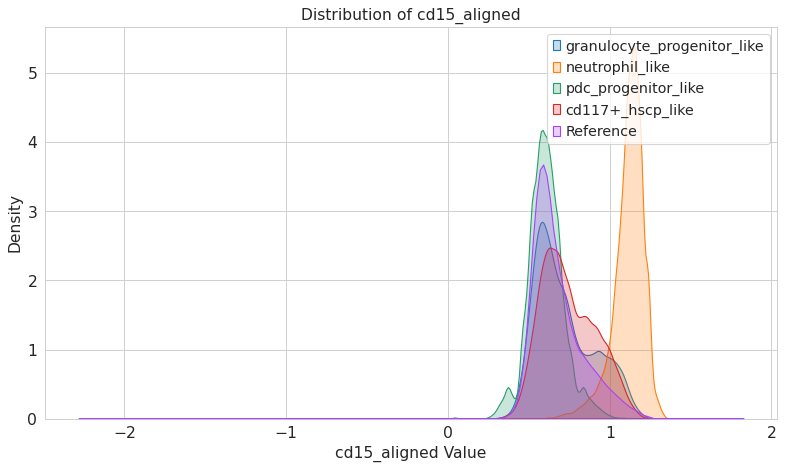

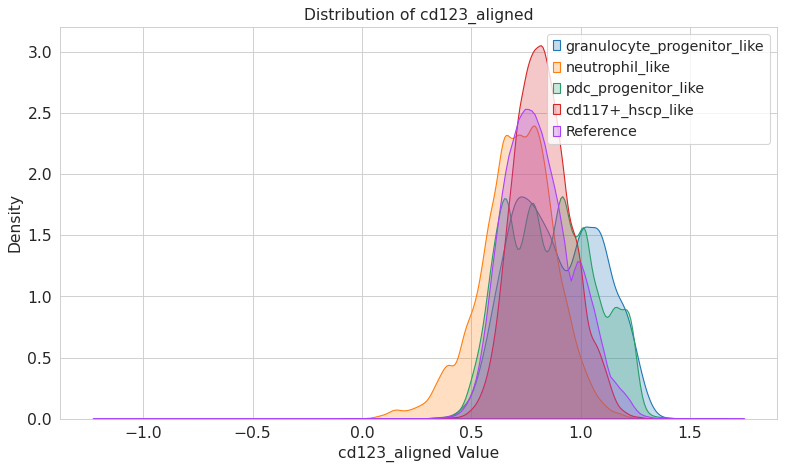

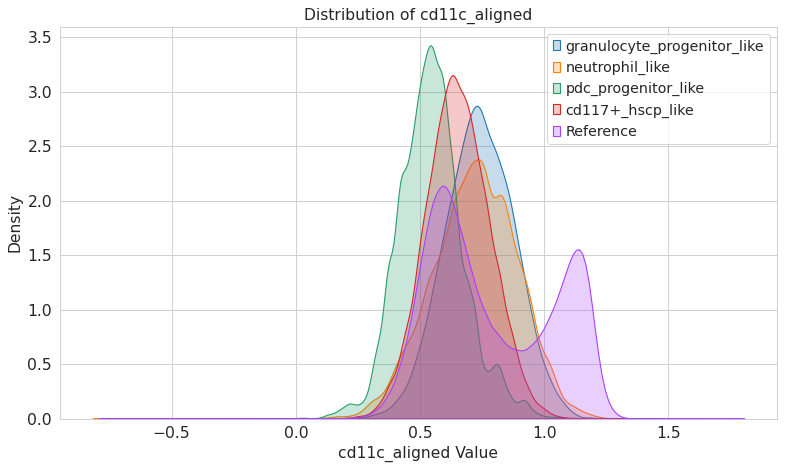

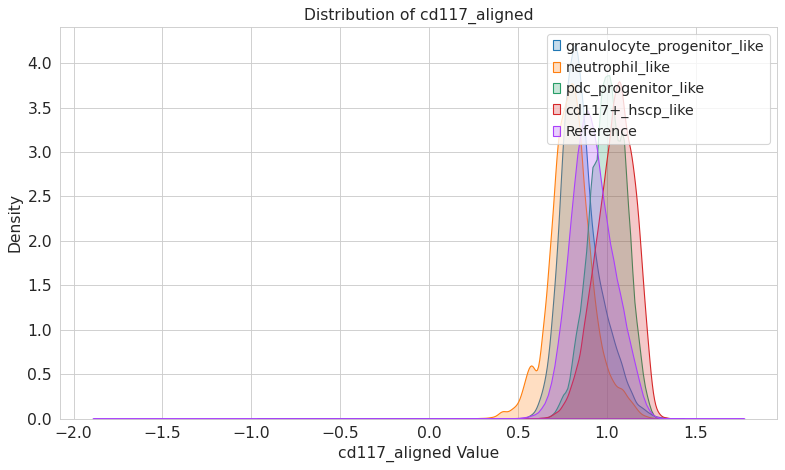

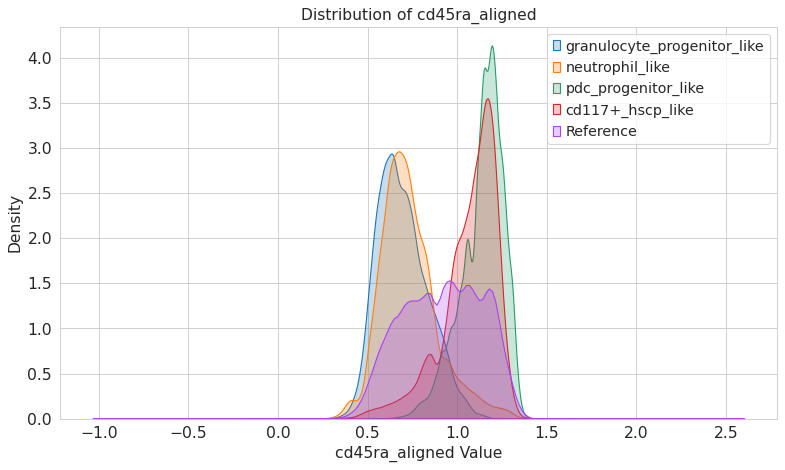

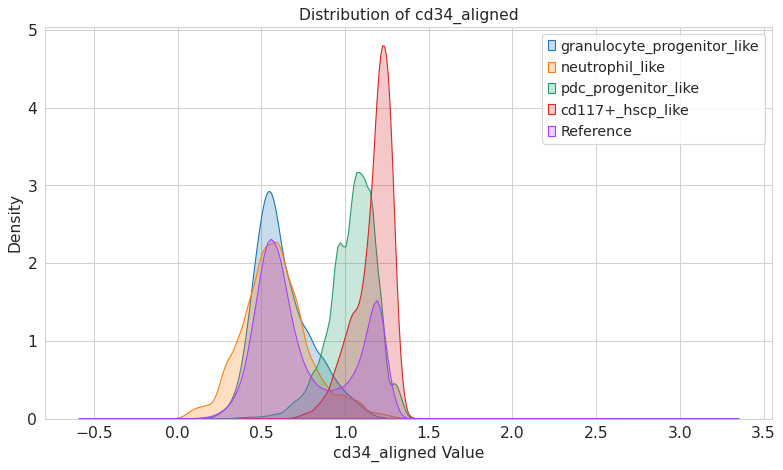

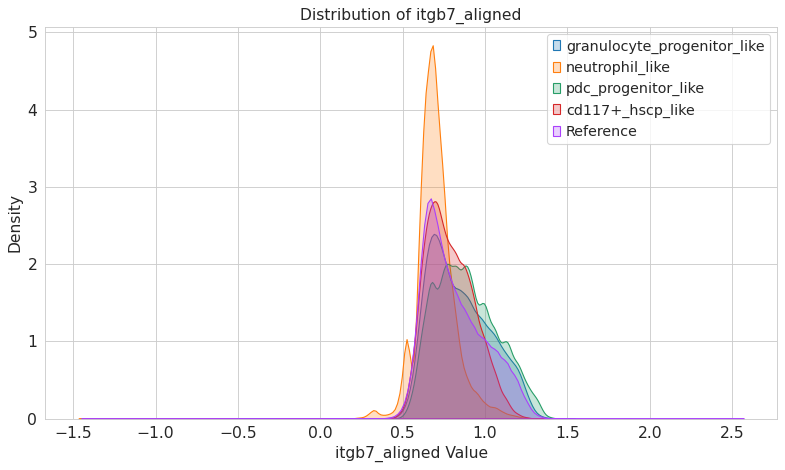

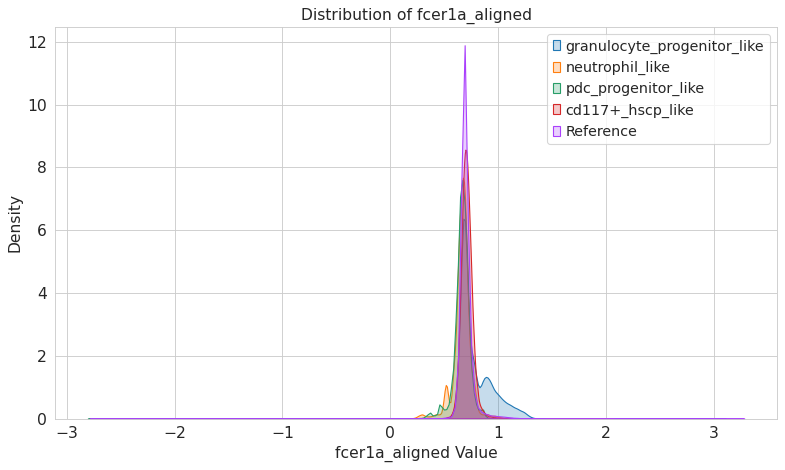

In [28]:
for marker in adata_ref.var_names:
    plot_feature_distribution([granu, neut, pdc_prog, cd117, adata_ref], marker ,
                              ['granulocyte_progenitor_like','neutrophil_like', 'pdc_progenitor_like', 'cd117+_hscp_like', 'Reference'])

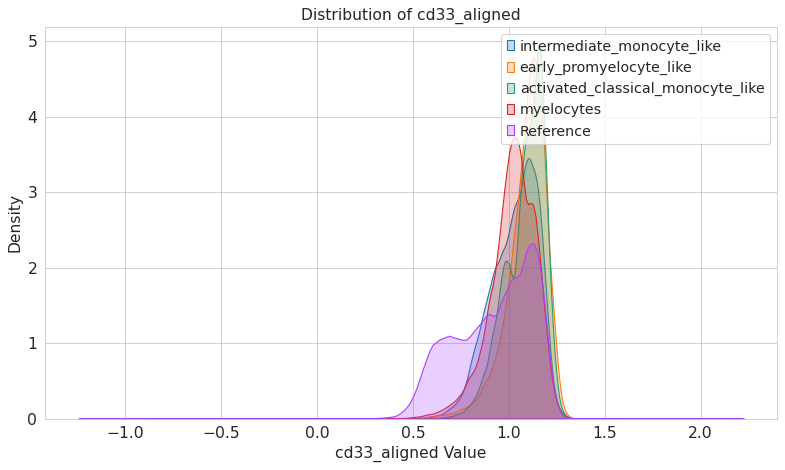

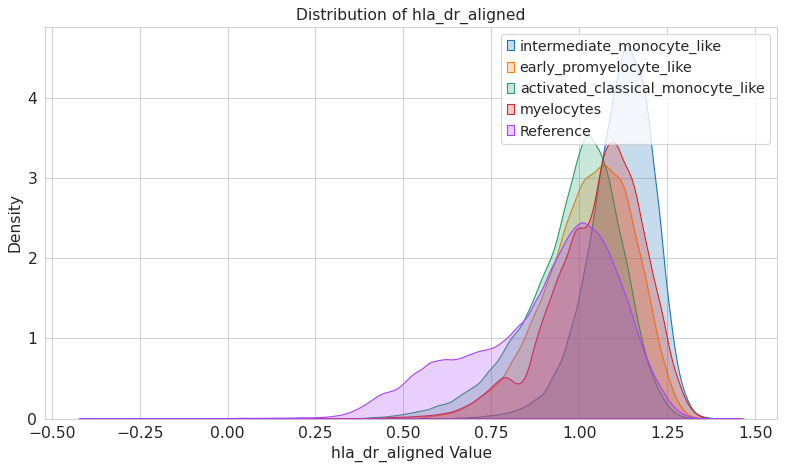

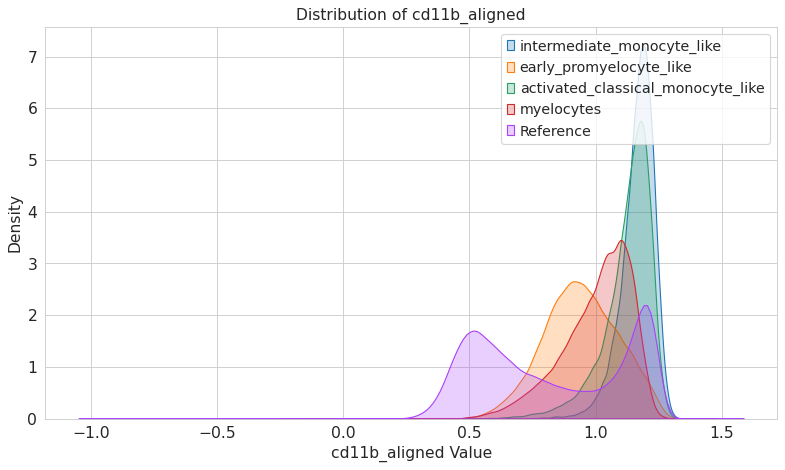

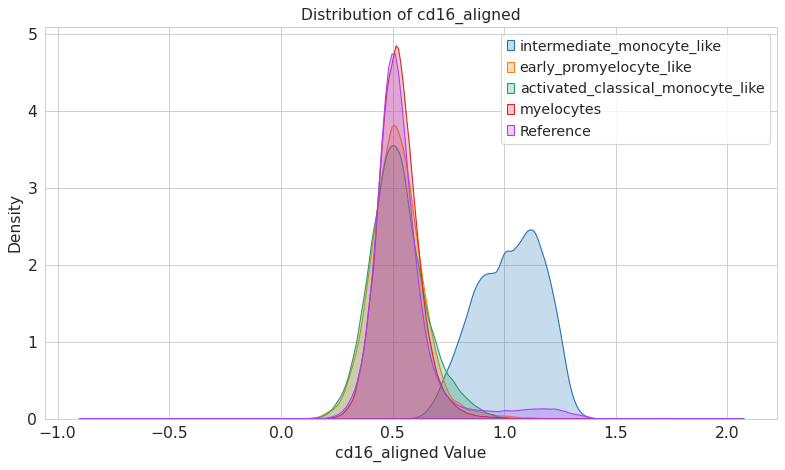

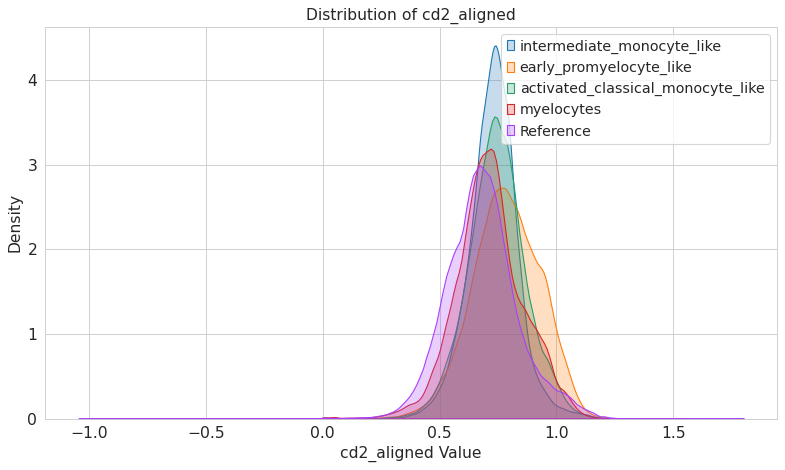

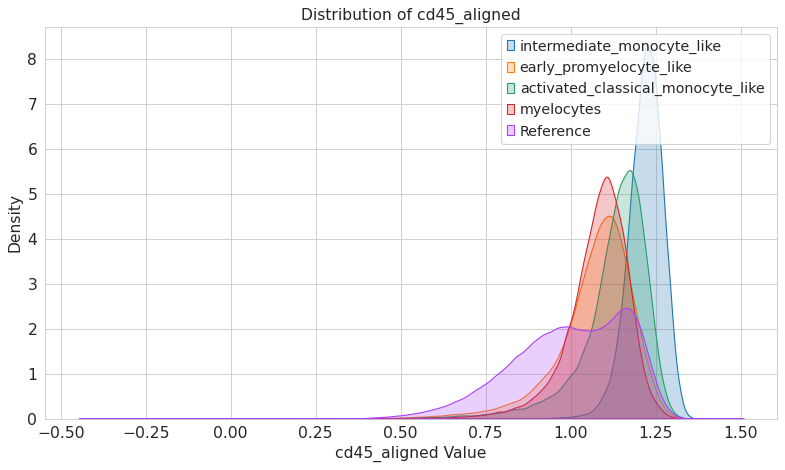

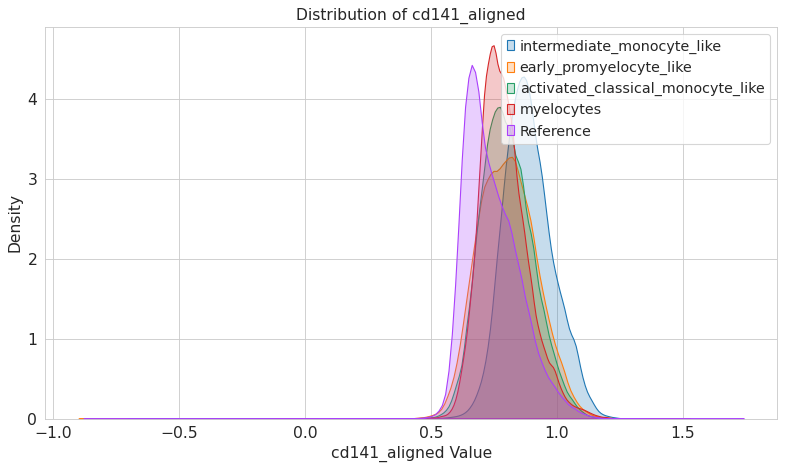

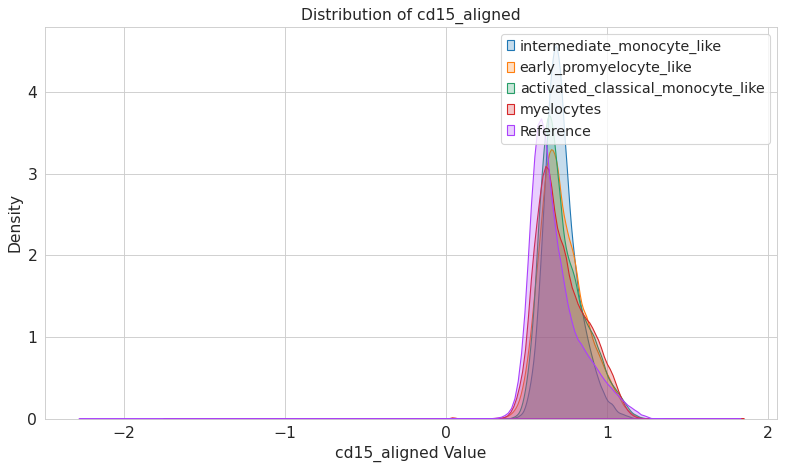

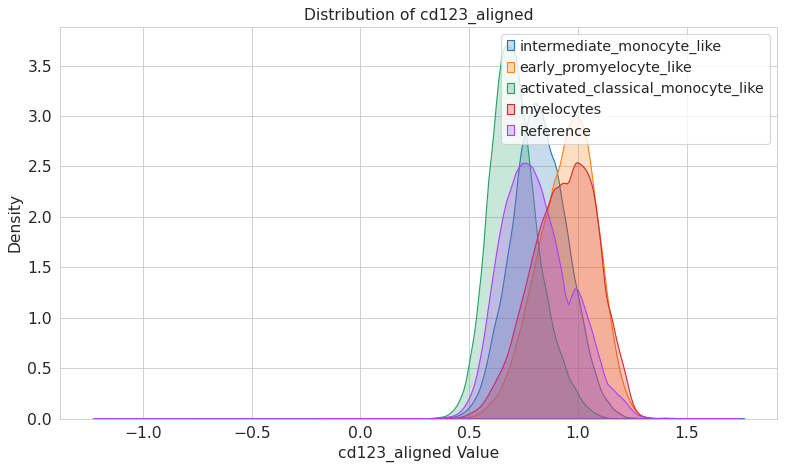

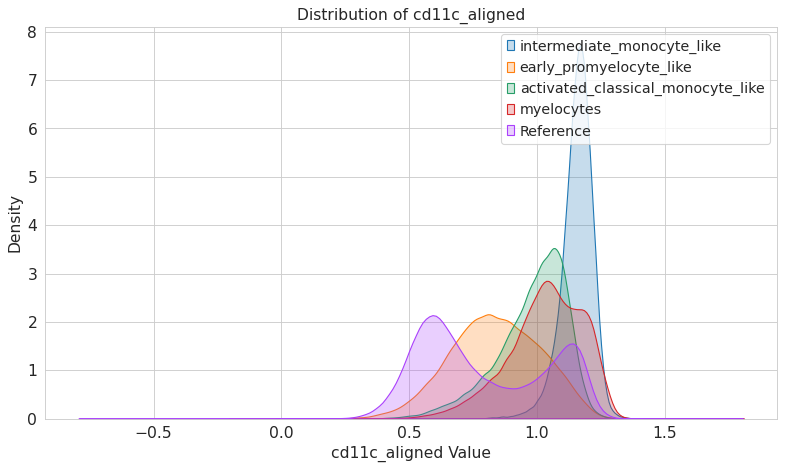

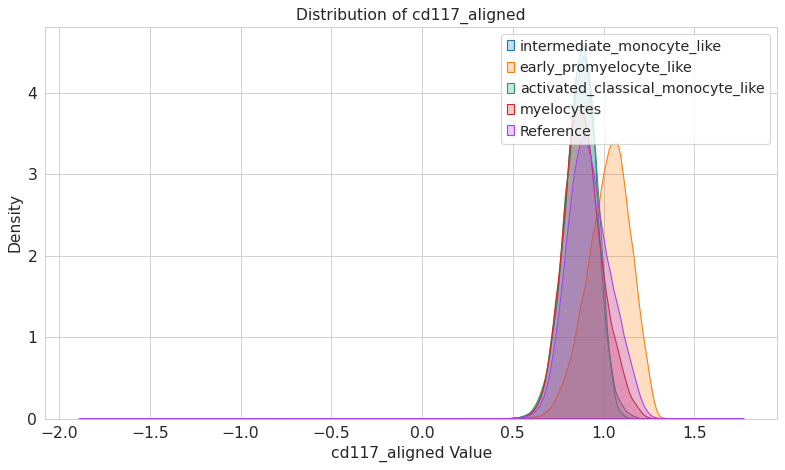

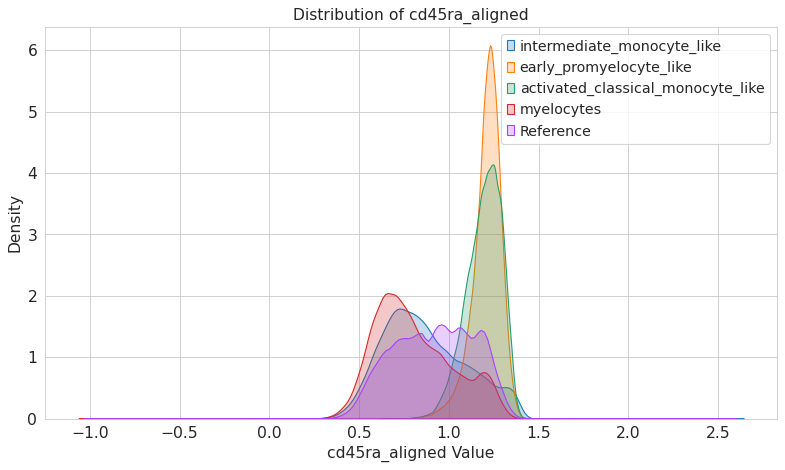

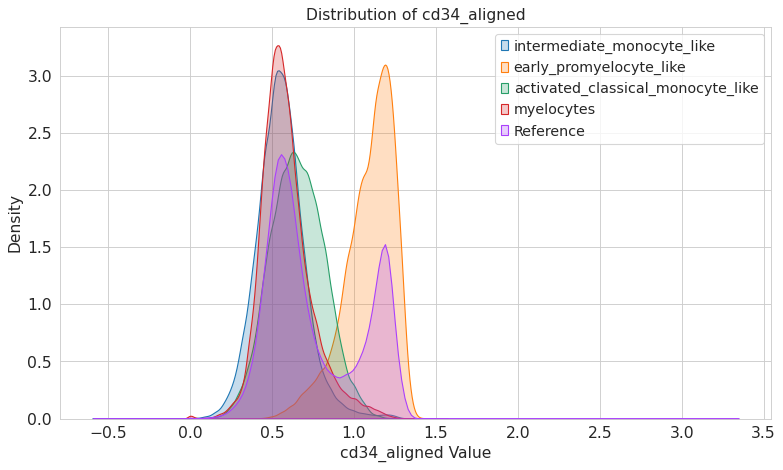

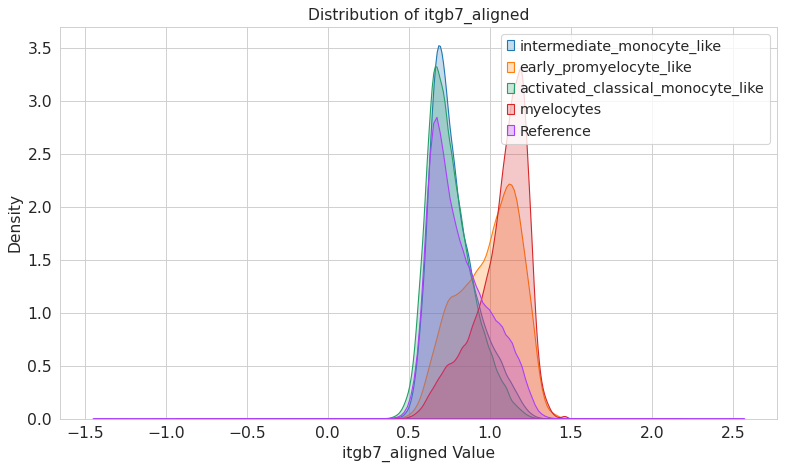

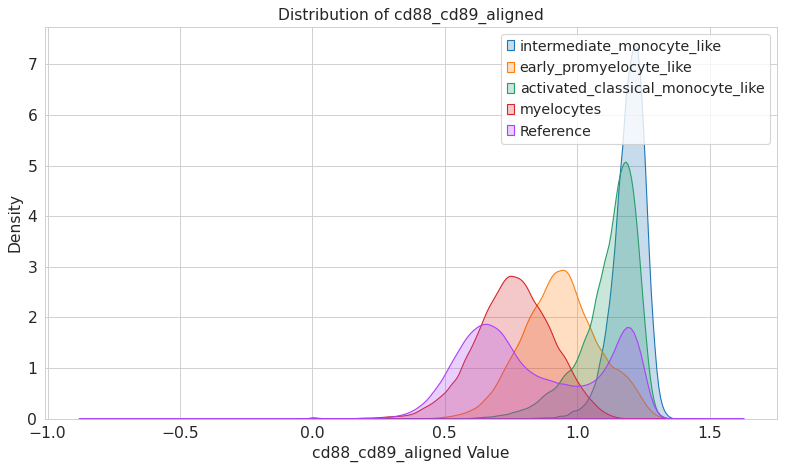

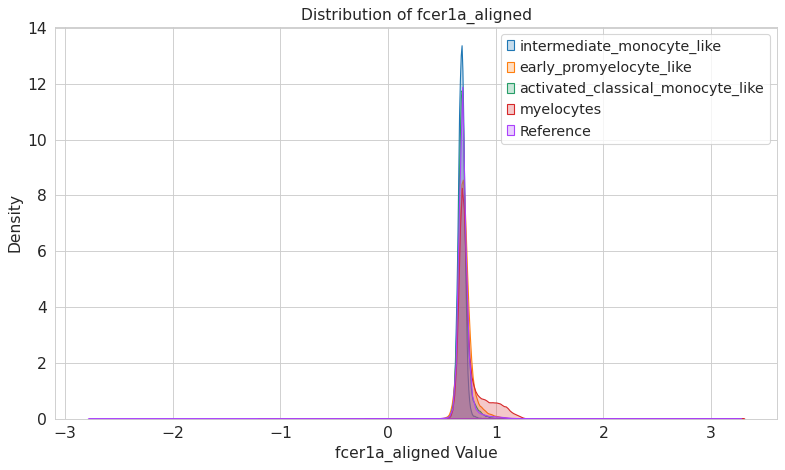

In [33]:
for marker in adata_ref.var_names:
    plot_feature_distribution([mono, promyelo, act_clas, myelo, adata_ref], marker ,
                              ['intermediate_monocyte_like','early_promyelocyte_like', 'activated_classical_monocyte_like', 'myelocytes', 'Reference'])

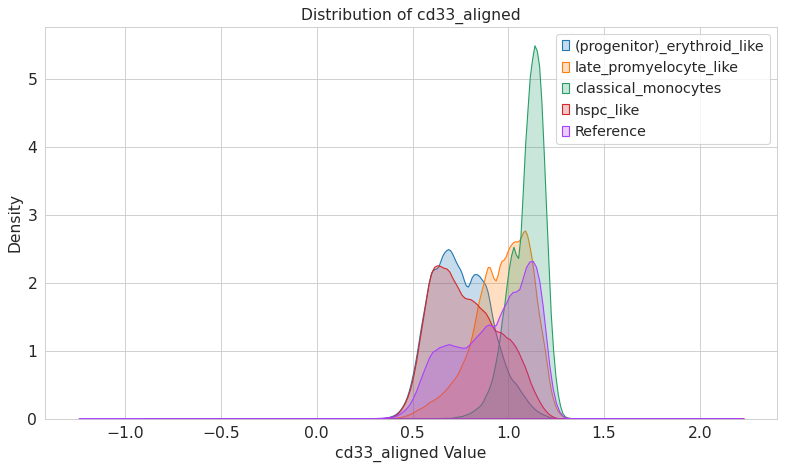

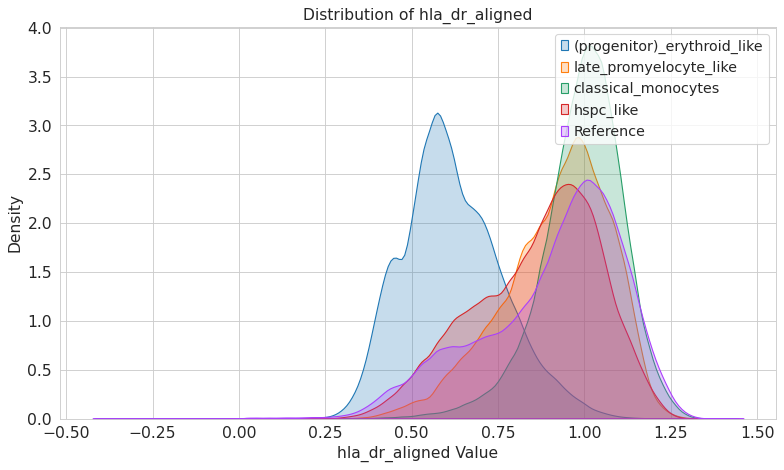

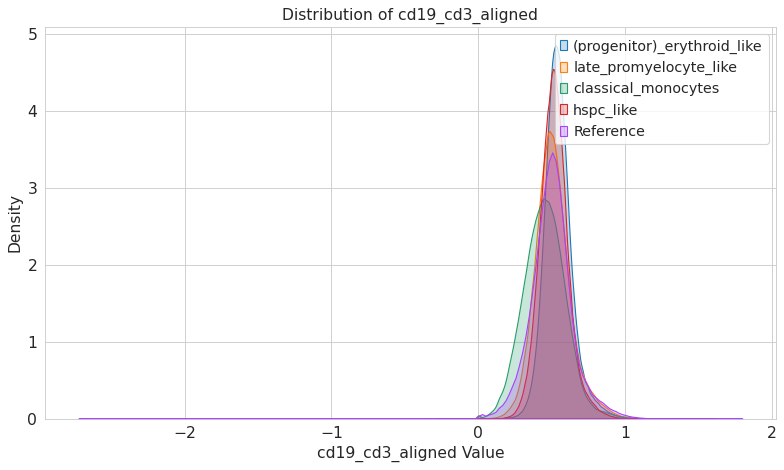

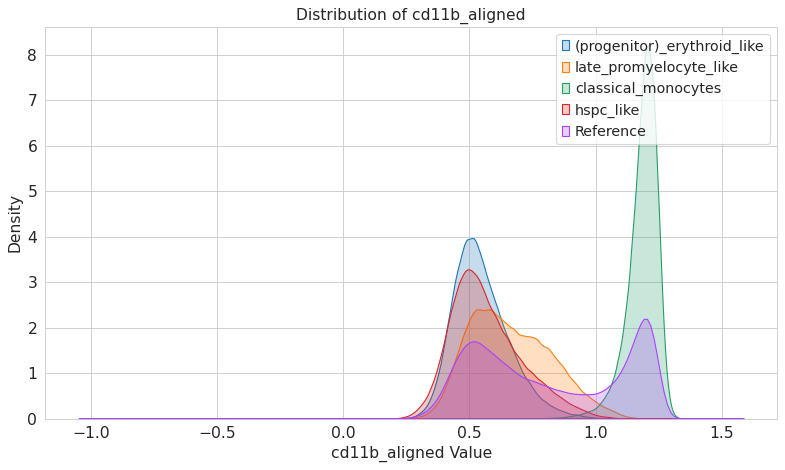

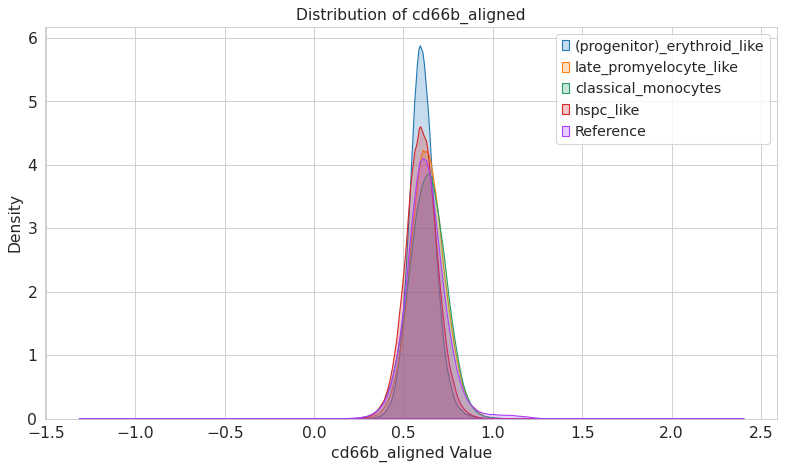

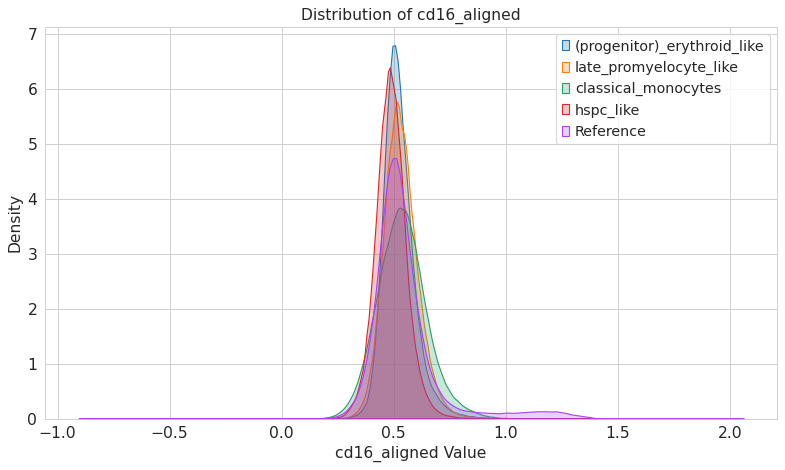

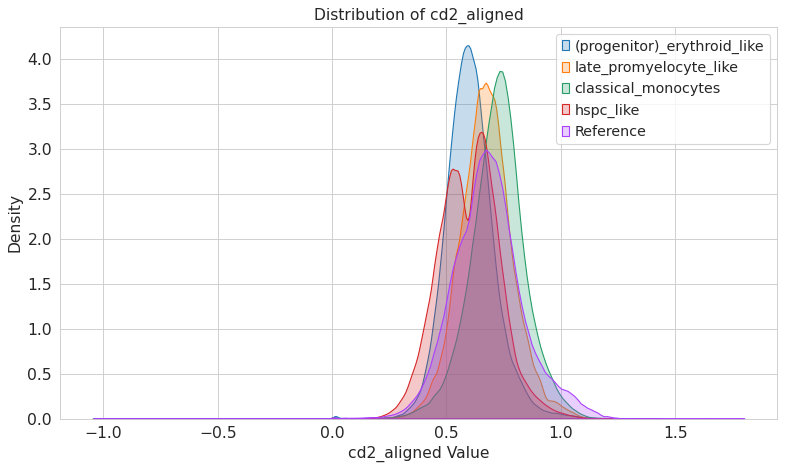

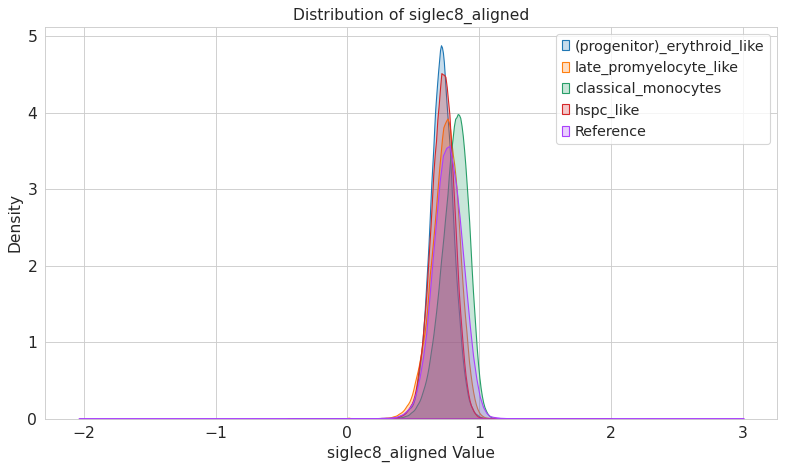

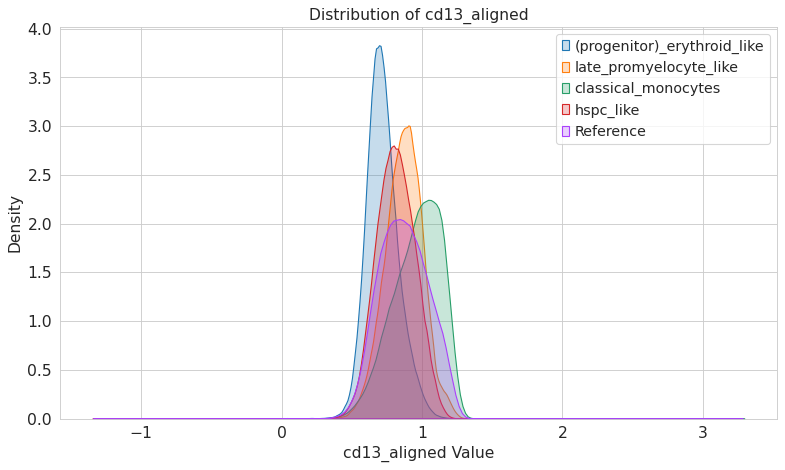

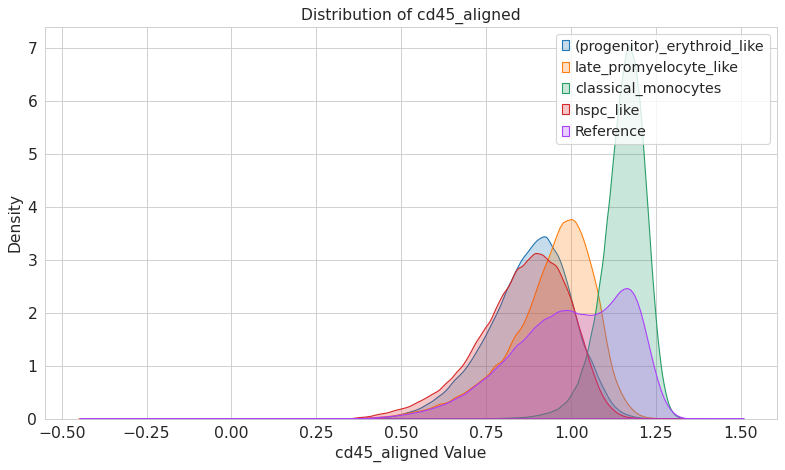

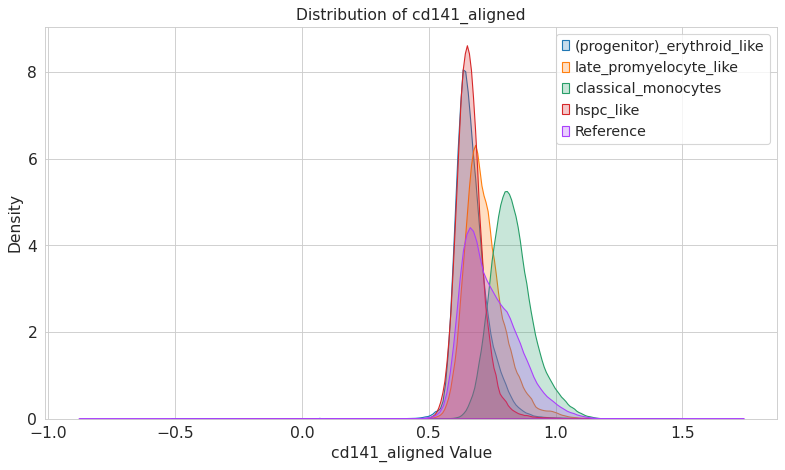

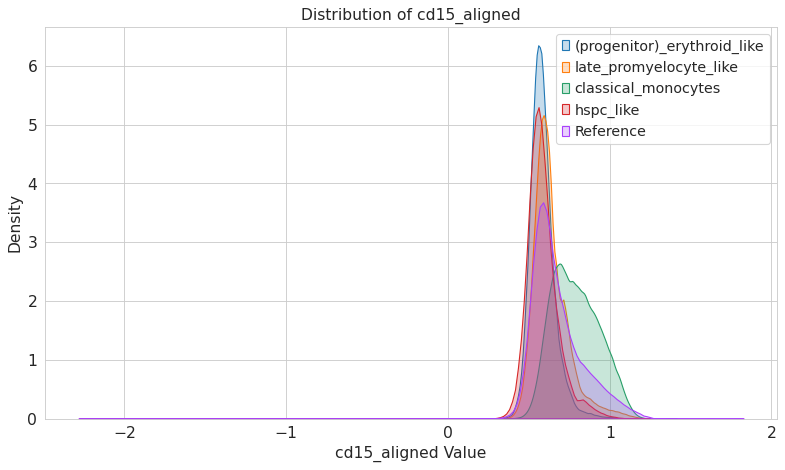

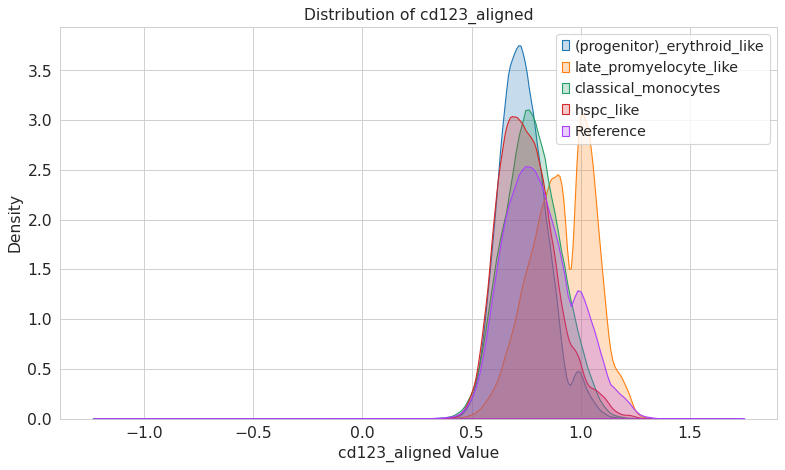

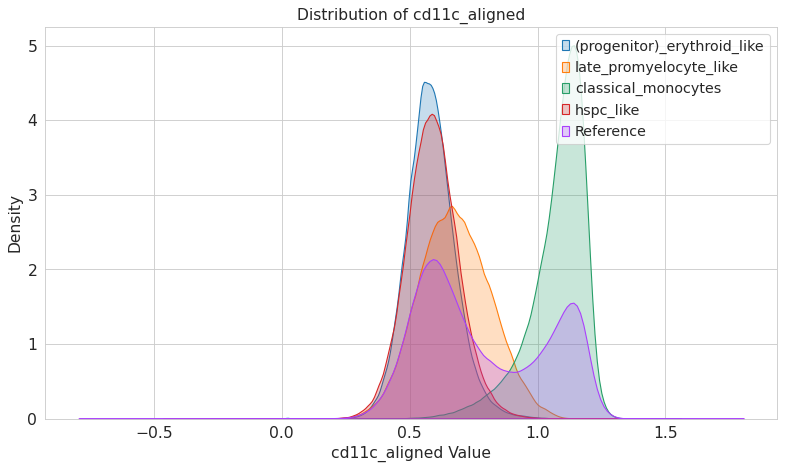

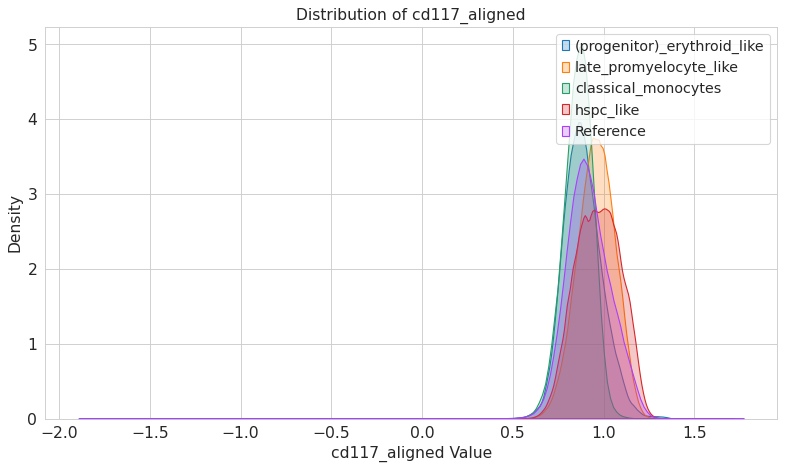

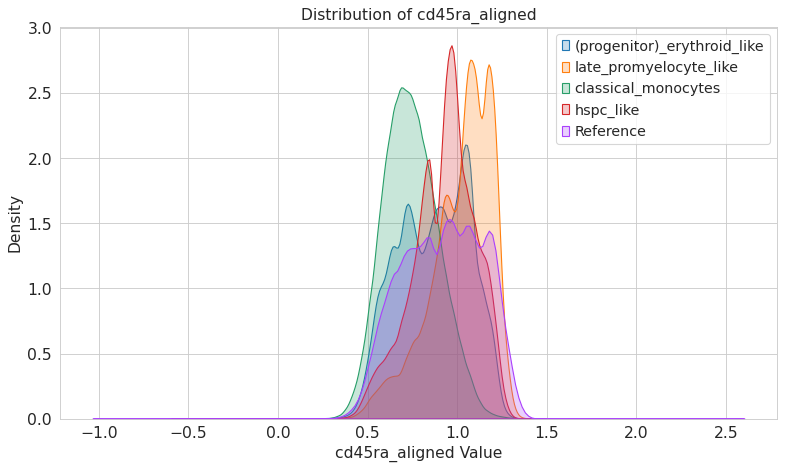

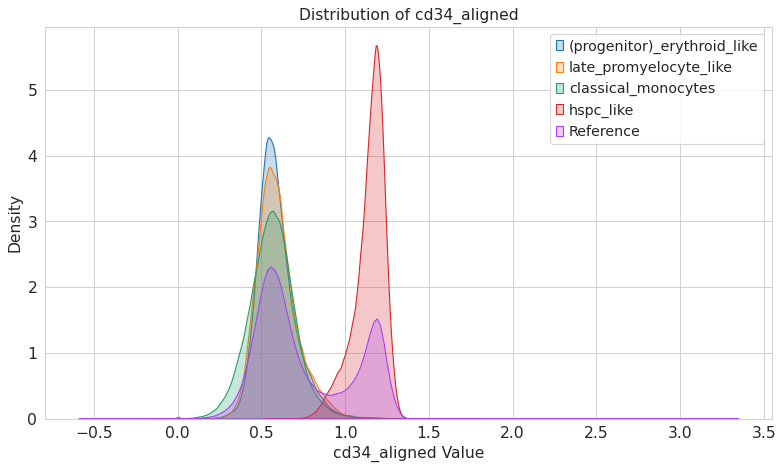

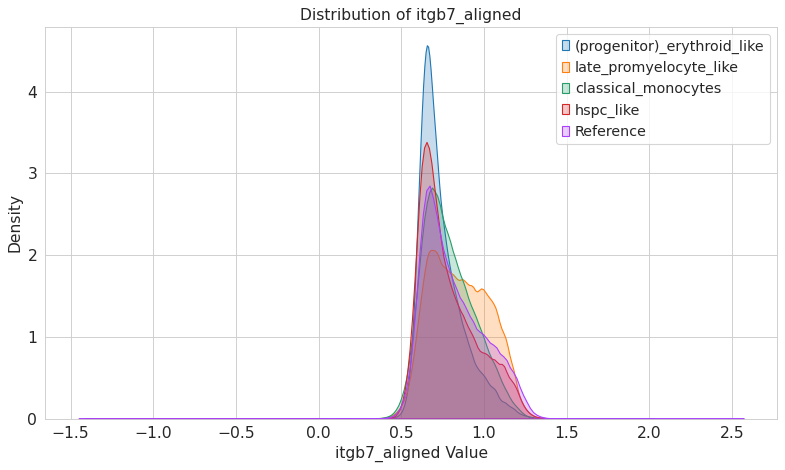

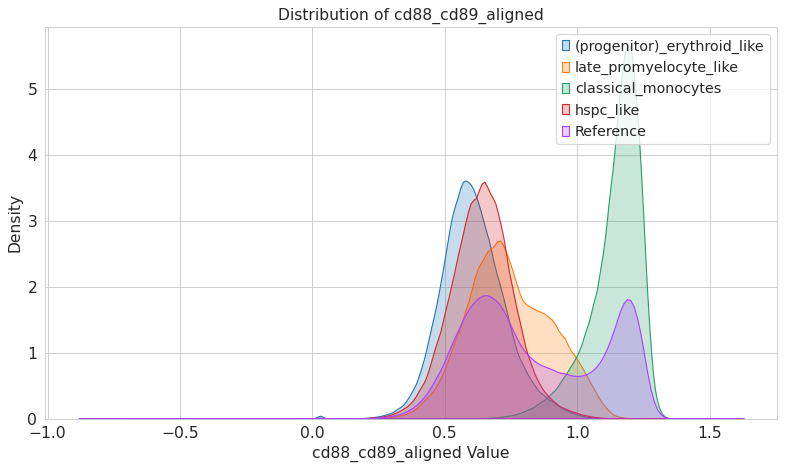

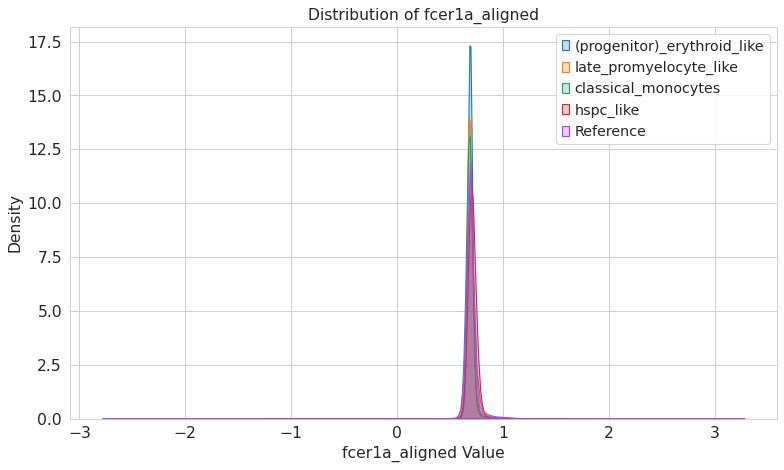

In [38]:
for marker in adata_ref.var_names:
    plot_feature_distribution([eryth, late_prom, clas_mono, hspc, adata_ref], marker ,
                              ['(progenitor)_erythroid_like','late_promyelocyte_like', 'classical_monocytes', 'hspc_like', 'Reference'])

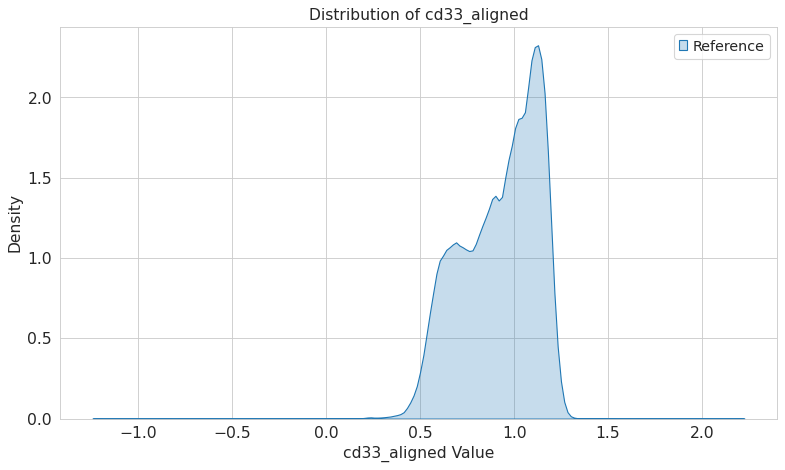

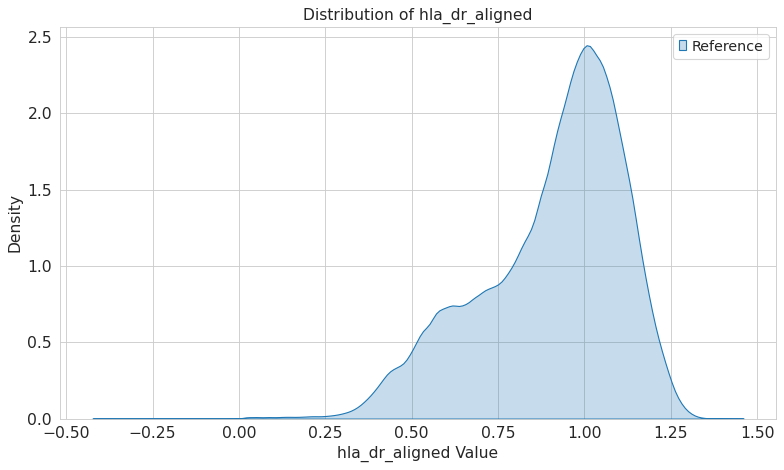

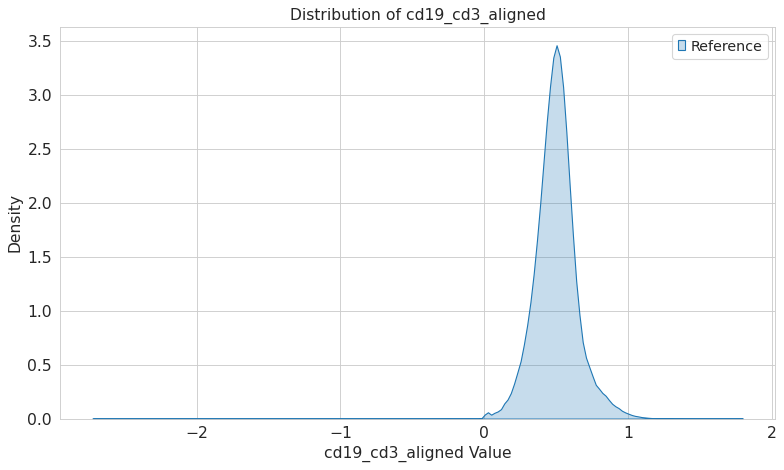

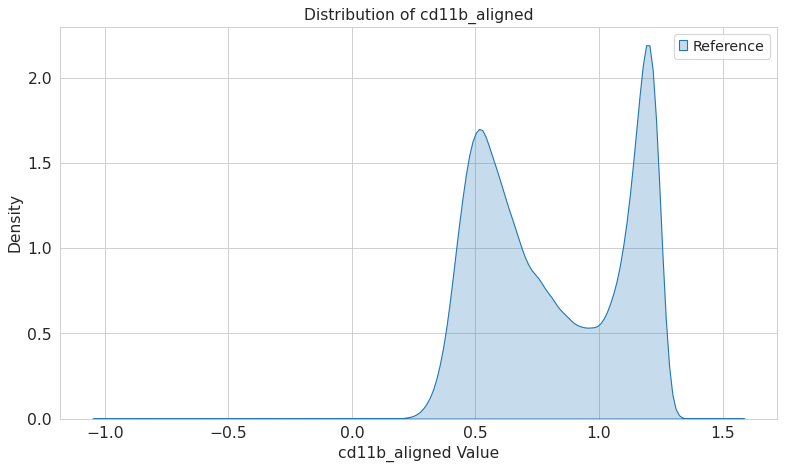

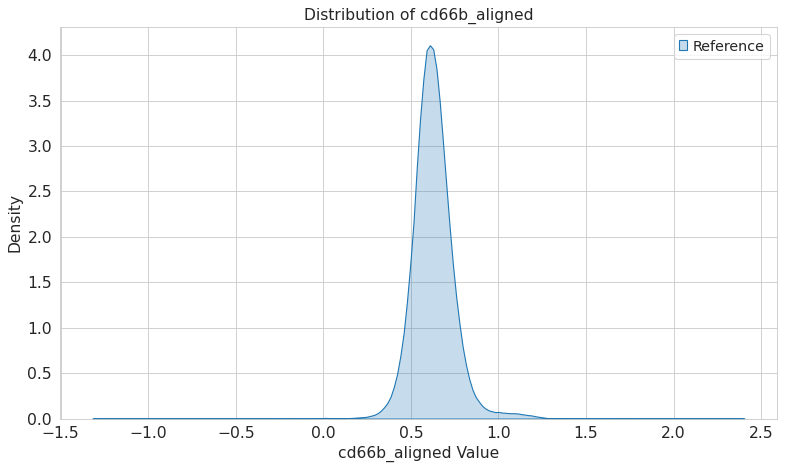

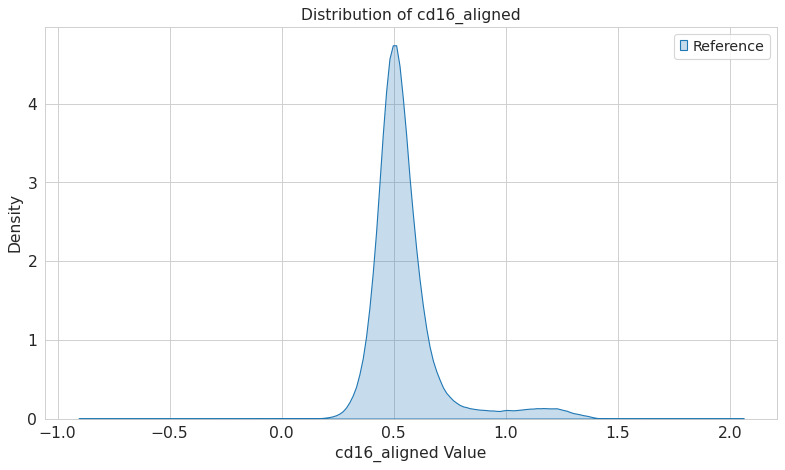

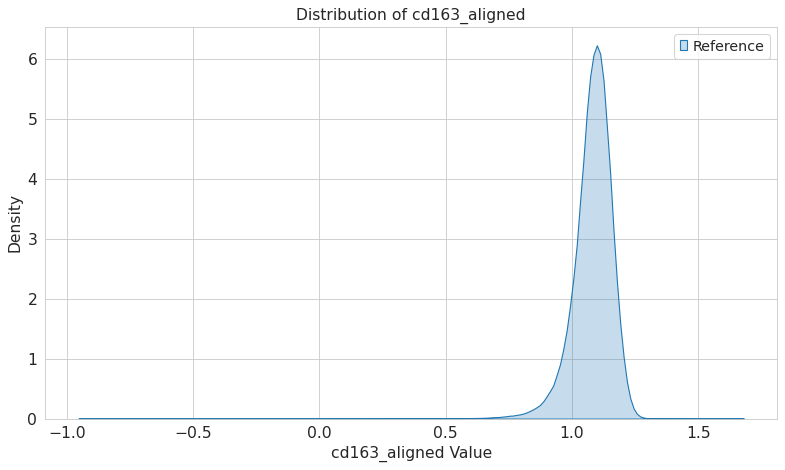

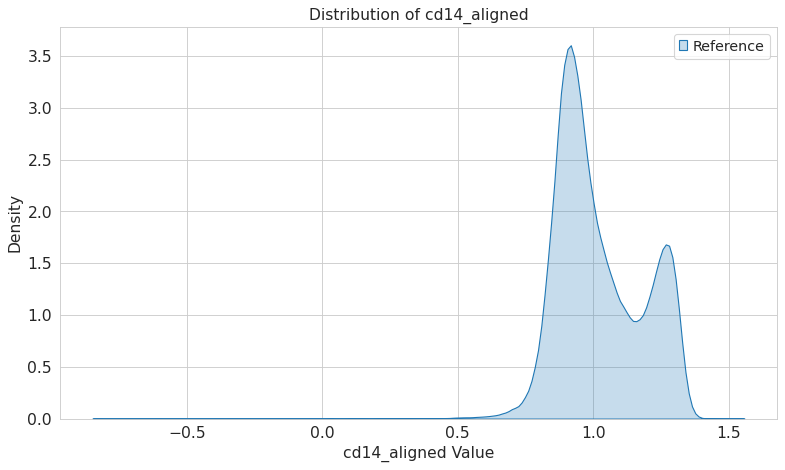

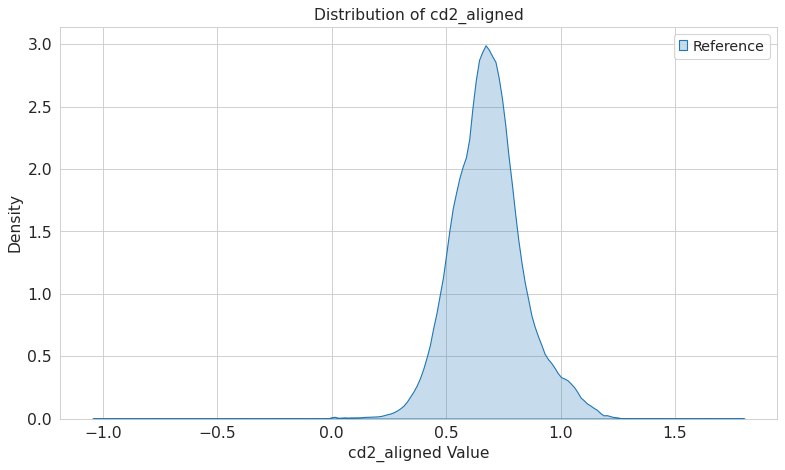

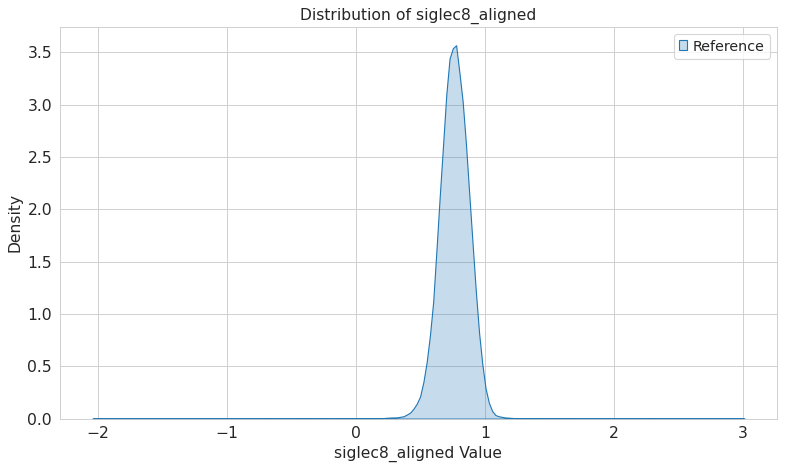

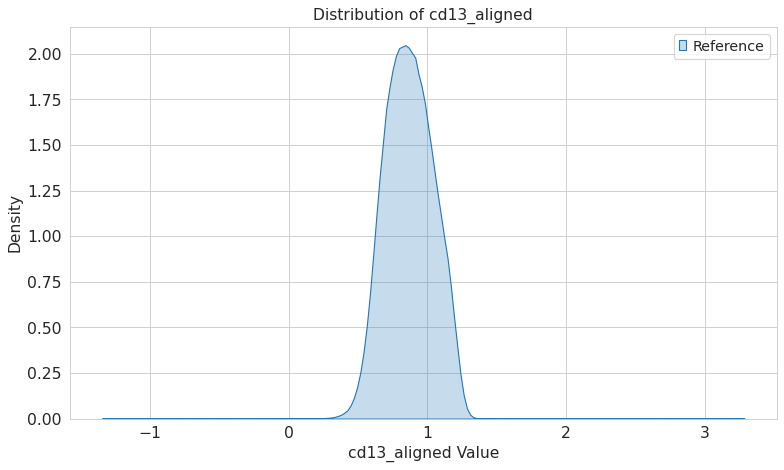

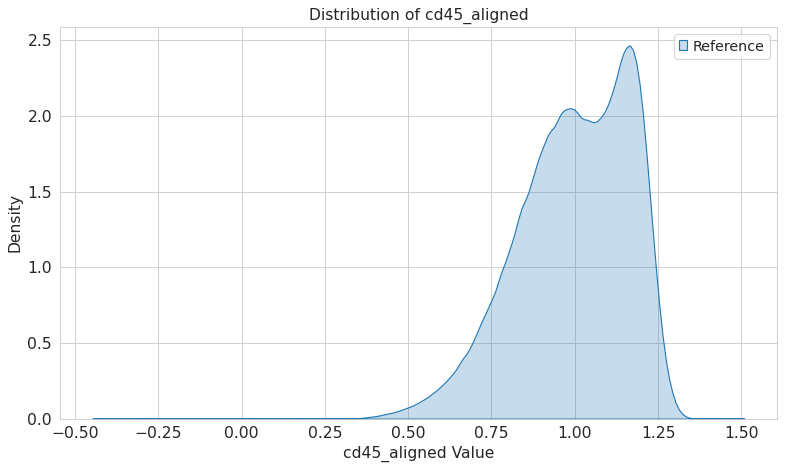

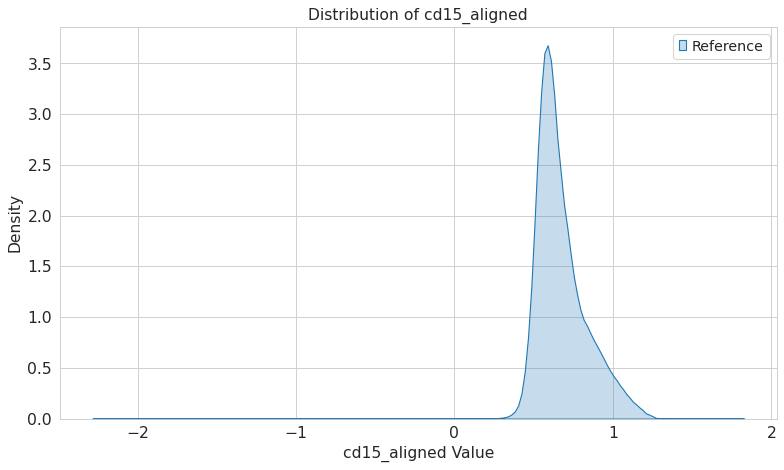

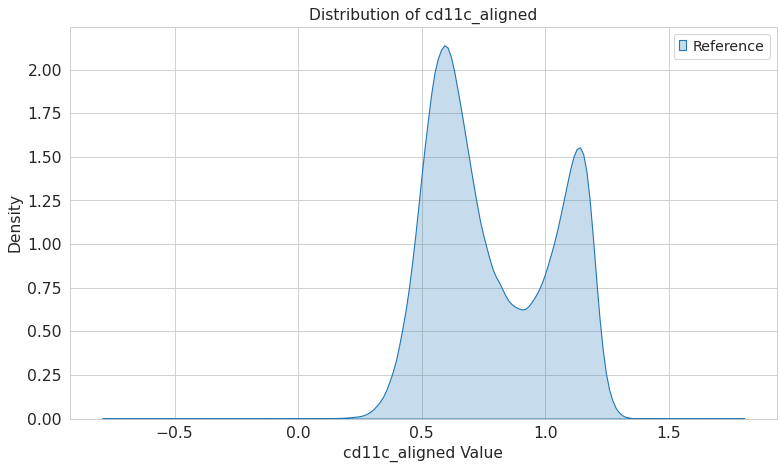

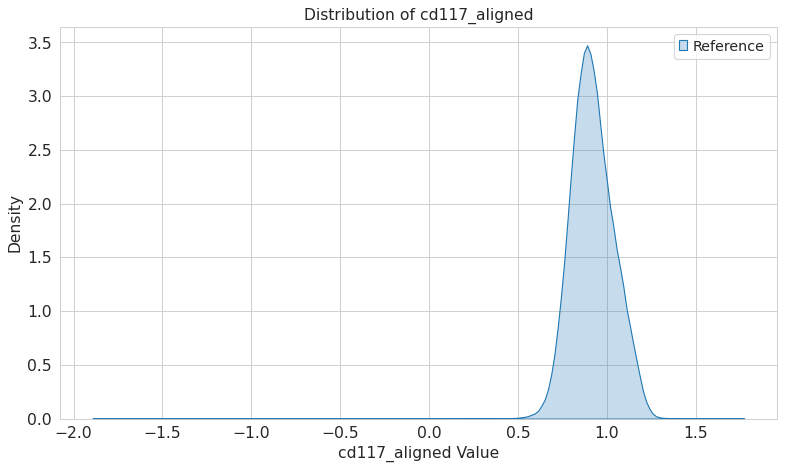

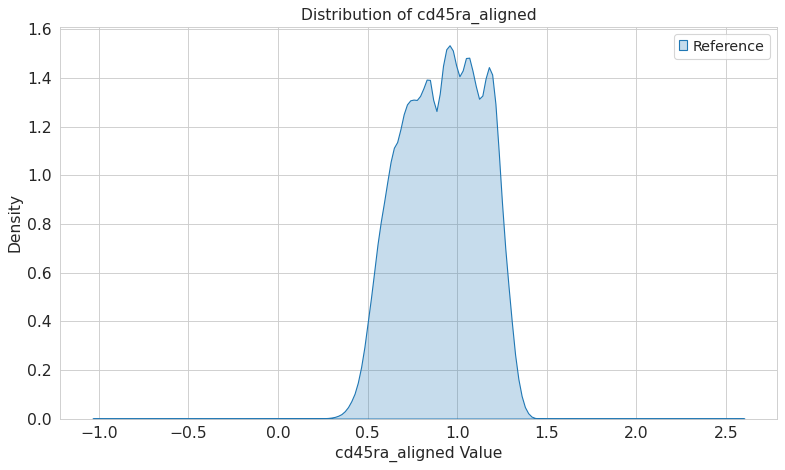

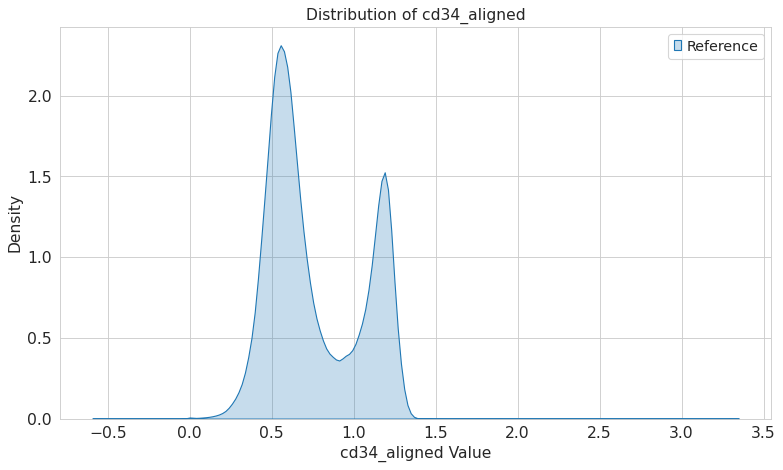

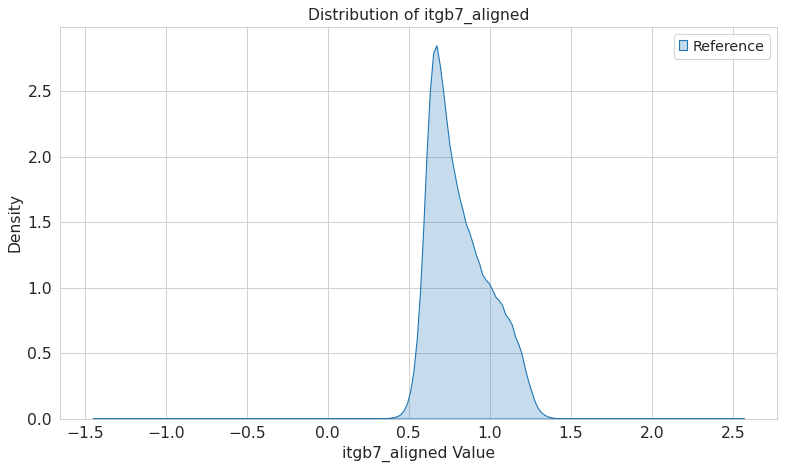

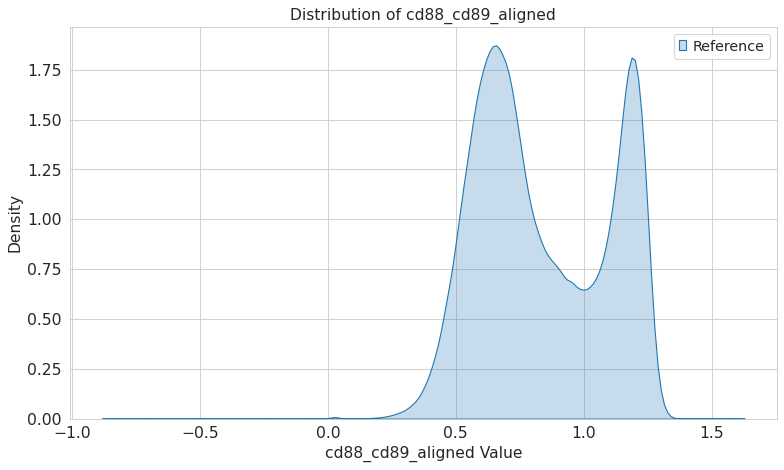

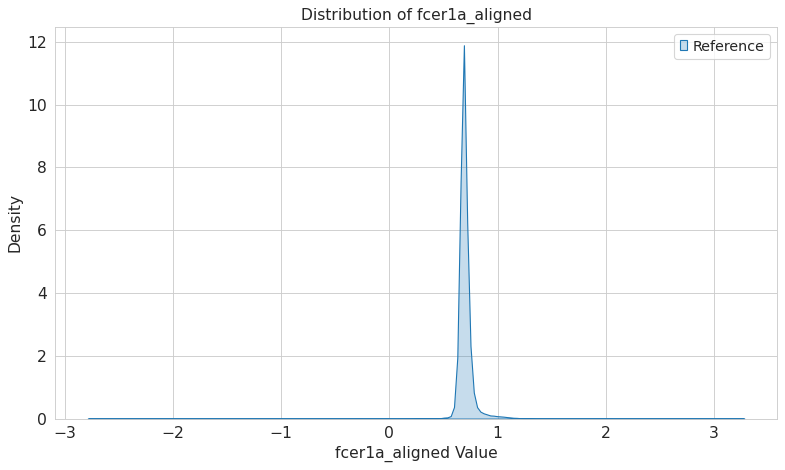

In [23]:

# Example usage for a feature named 'marker1'
for marker in adata_ref.var_names:
    plot_feature_distribution([ adata_ref], marker , ['Reference'])